In [2]:
from google.colab import files
data_to_load = files.upload()

Saving toxic_test.csv to toxic_test.csv


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import oracles
from optimization import *
import utils
import scipy as sc
import re
%matplotlib inline

In [73]:
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='grey', ls=':')
plt.rc('font', family='serif', serif=['XCharter'])
plt.rc('savefig', bbox='tight', pad_inches=0.1, format='pdf')
plt.rcParams.update({'font.size': 22})

In [74]:
X_train = pd.read_csv('toxic_train.csv')
X_test = pd.read_csv('toxic_test.csv')

In [6]:
X_train

Unnamed: 0                                       comment_text  is_toxic
0               0  Explanation\nWhy the edits made under my usern...     False
1               1  D'aww! He matches this background colour I'm s...     False
2               2  Hey man, I'm really not trying to edit war. It...     False
3               3  "\nMore\nI can't make any real suggestions on ...     False
4               4  You, sir, are my hero. Any chance you remember...     False
...           ...                                                ...       ...
52056      159494  "\n\n our previous conversation \n\nyou fuckin...      True
52057      159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR      True
52058      159541  Your absurd edits \n\nYour absurd edits on gre...      True
52059      159546  "\n\nHey listen don't you ever!!!! Delete my e...      True
52060      159554  and i'm going to keep posting the stuff u dele...      True

[52061 rows x 3 columns]

In [7]:
X_test

Unnamed: 0                                       comment_text  is_toxic
0               0  Thank you for understanding. I think very high...     False
1               1                   :Dear god this site is horrible.     False
2               2  "::: Somebody will invariably try to add Relig...     False
3               3  " \n\n It says it right there that it IS a typ...     False
4               4  " \n\n == Before adding a new product to the l...     False
...           ...                                                ...       ...
20671       63877                          NIGEL IS A CRAZY IDIOT!!!      True
20672       63935    " \n ::Well, now don't I feel stupid....   ·  "      True
20673       63945  ==Fourth Baldrick possibly being cleverer than...      True
20674       63962  " \n\n == IRAN == \n That’s right, Iran. It wa...      True
20675       63976  MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...      True

[20676 rows x 3 columns]

In [75]:
y_train = X_train.pop('is_toxic')
y_test = X_test.pop('is_toxic')

# Предобработка

In [76]:
def preprocess(X):
    X['comment_text'] = X['comment_text'].str.lower()
    X['comment_text'] = X.apply(lambda x: re.sub('[^0-9a-z]+', ' ', x['comment_text']), axis=1)
    X['comment_text'] = X.apply(lambda x: re.sub('\n', ' ', x['comment_text']), axis=1)
    X['comment_text'] = X.apply(lambda x: re.sub('\s+', ' ', x['comment_text']), axis=1)
    X['comment_text'] = X['comment_text'].str.strip()
    return X

In [77]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [78]:
y_train[y_train == True] = 1
y_train[y_train == False] = -1
y_train = y_train.astype('int64')

y_test[y_test == True] = 1
y_test[y_train == False] = -1
y_test = y_test.astype('int64')

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df=0.0001)

In [80]:
X_train = count_vectorizer.fit_transform(X_train['comment_text'])
X_test = count_vectorizer.transform(X_test['comment_text'])

In [14]:
X_train.shape

(52061, 16050)

In [81]:
from sklearn.model_selection import train_test_split
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)

# Исследования

In [82]:
results = {}
alphas = np.logspace(0, -3,  10)
betas = np.arange(0, 2.5, 0.5)
args = {'l2_coef': 0}

In [17]:
for alpha in alphas:
    for beta in betas:
        clf = GDClassifier(loss_function='binary_logistic', step_alpha=alpha, step_beta=beta, tolerance=1e-5, max_iter=1000, **args)
        results[(alpha, beta)] = clf.fit(X_train_t, y_train_t, w_0=None, trace=True, X_val=X_val, y_val=y_val)


In [19]:
print(alphas)
print(betas)

[1.         0.46415888 0.21544347 0.1        0.04641589 0.02154435
 0.01       0.00464159 0.00215443 0.001     ]
[0.  0.5 1.  1.5 2. ]


In [20]:
results[(0.1, 1)]['func']

[0.6931471805599453,
 0.6188800629922986,
 0.6121785646883925,
 0.6094077098290758,
 0.6076102979656248,
 0.606275333296999,
 0.6052137483118768,
 0.604334840024441,
 0.6035868574352192,
 0.602937232029538,
 0.6023641006310884,
 0.6018520786033202,
 0.6013899382274575,
 0.6009692420937699,
 0.6005834947875787,
 0.600227593432546,
 0.5998974591069562,
 0.5995897821807725,
 0.5993018418559182,
 0.5990313754510513,
 0.598776481878397,
 0.5985355491442264,
 0.5983071990600957,
 0.5980902445000617,
 0.5978836559473513,
 0.5976865350170569,
 0.5974980932852368,
 0.5973176352019898,
 0.5971445441816522,
 0.5969782711892164,
 0.5968183253059935,
 0.5966642658779736,
 0.5965156959397757,
 0.5963722566742449,
 0.5962336227186651,
 0.5960994981675194,
 0.5959696131517788,
 0.5958437208981014,
 0.5957215951896413,
 0.5956030281646371,
 0.5954878284004573,
 0.5953758192399605,
 0.5952668373244356,
 0.5951607313033712,
 0.5950573606961693,
 0.594956594884901,
 0.5948583122204729,
 0.5947623992272736

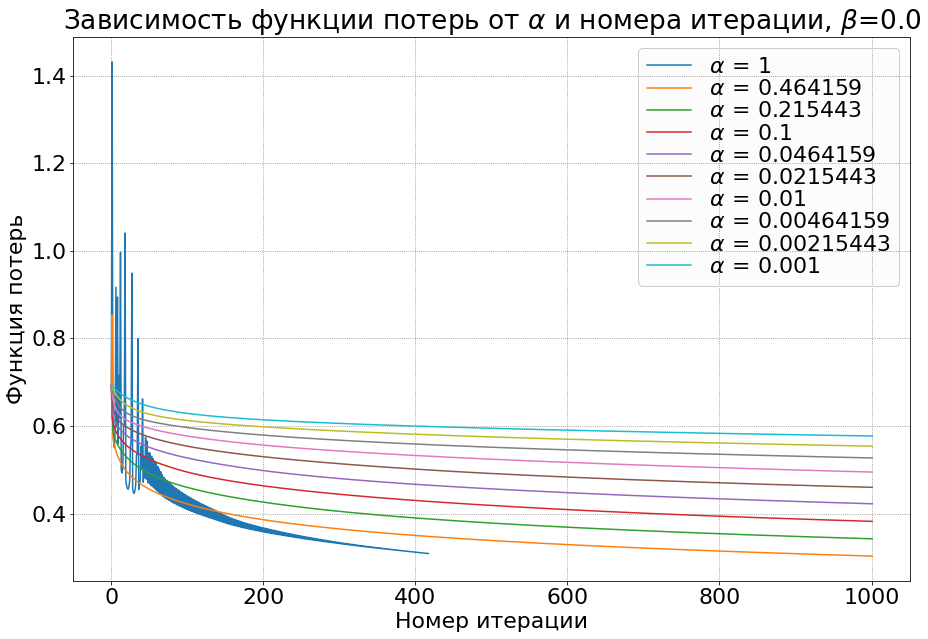

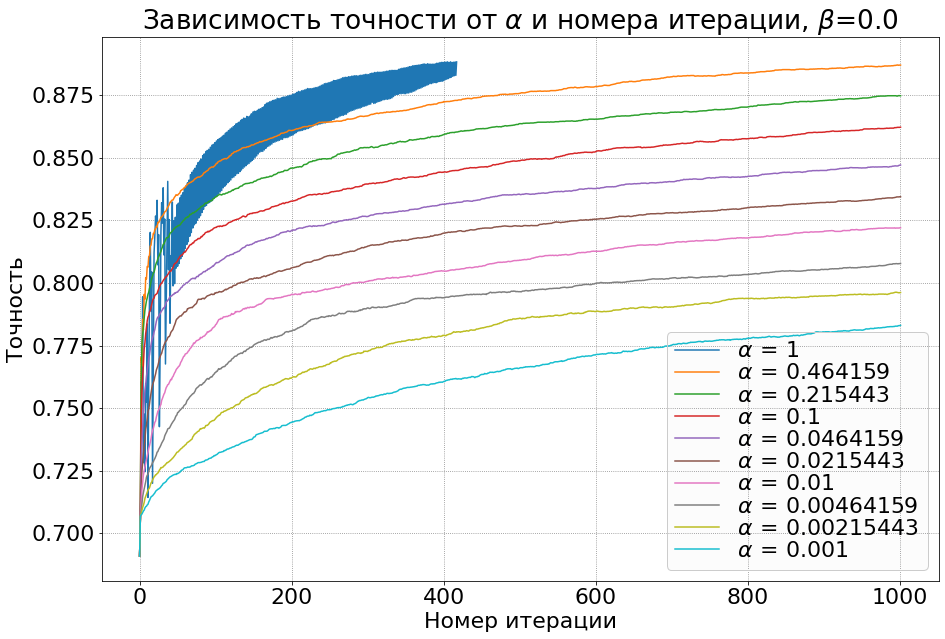

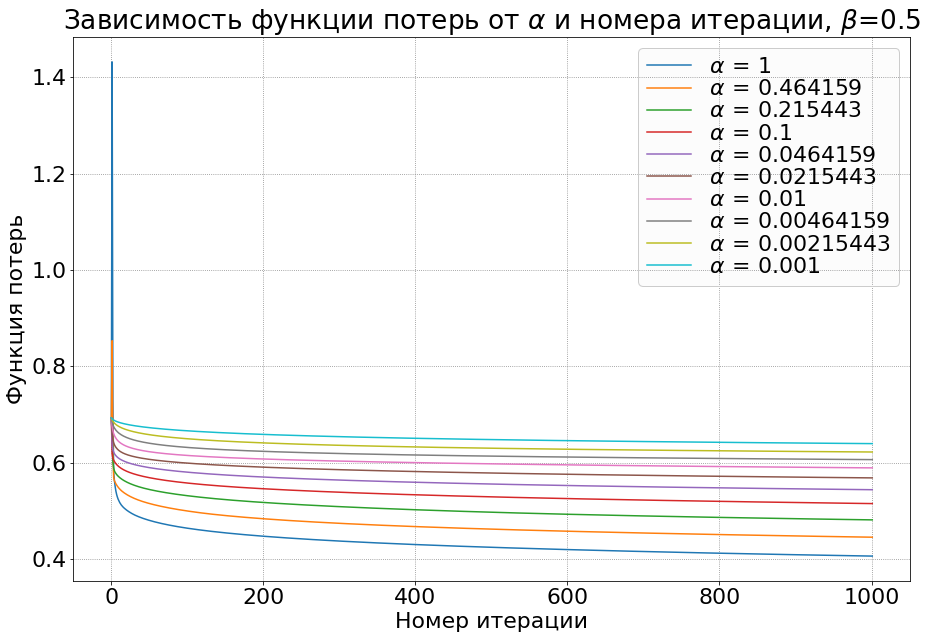

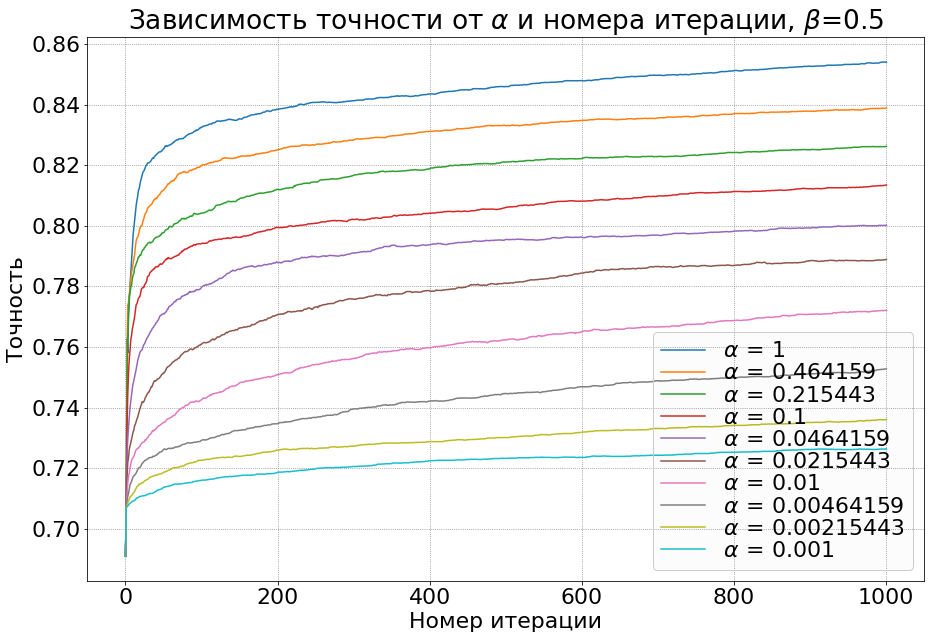

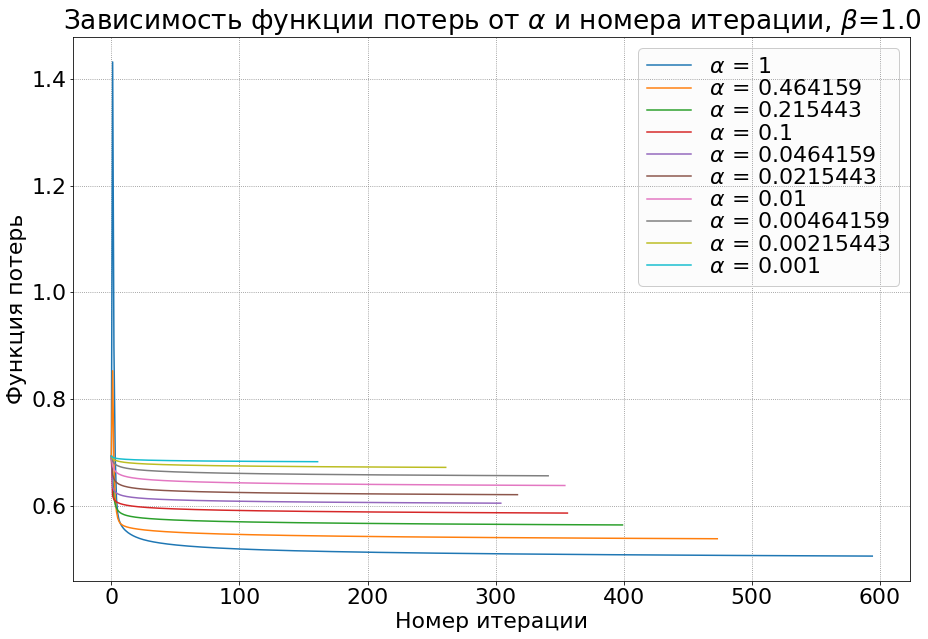

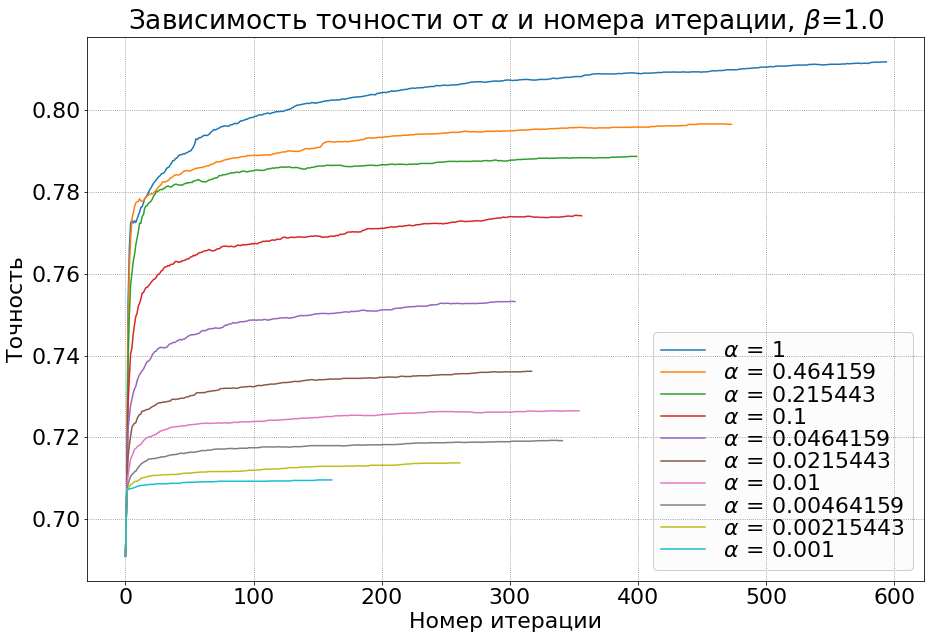

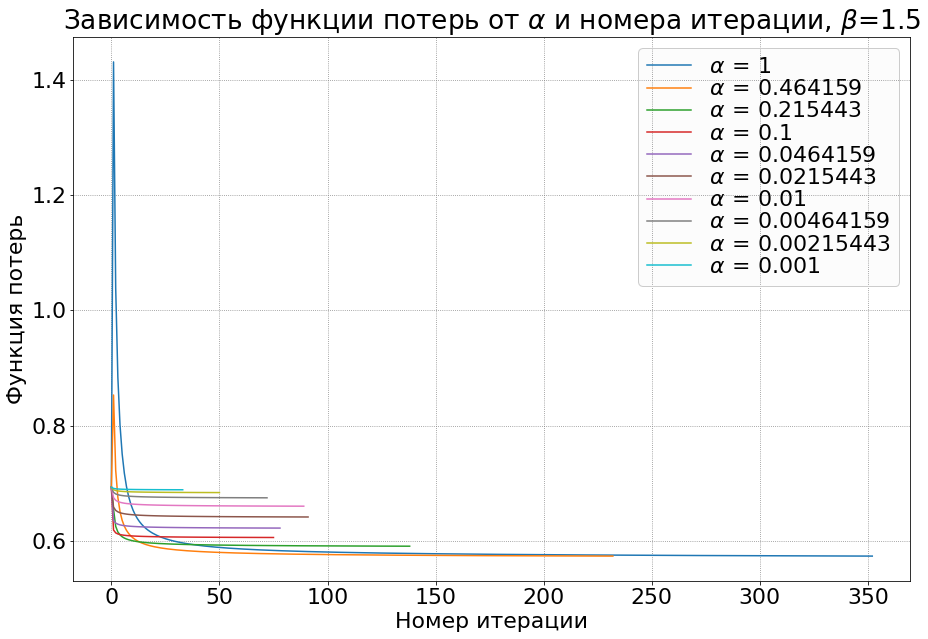

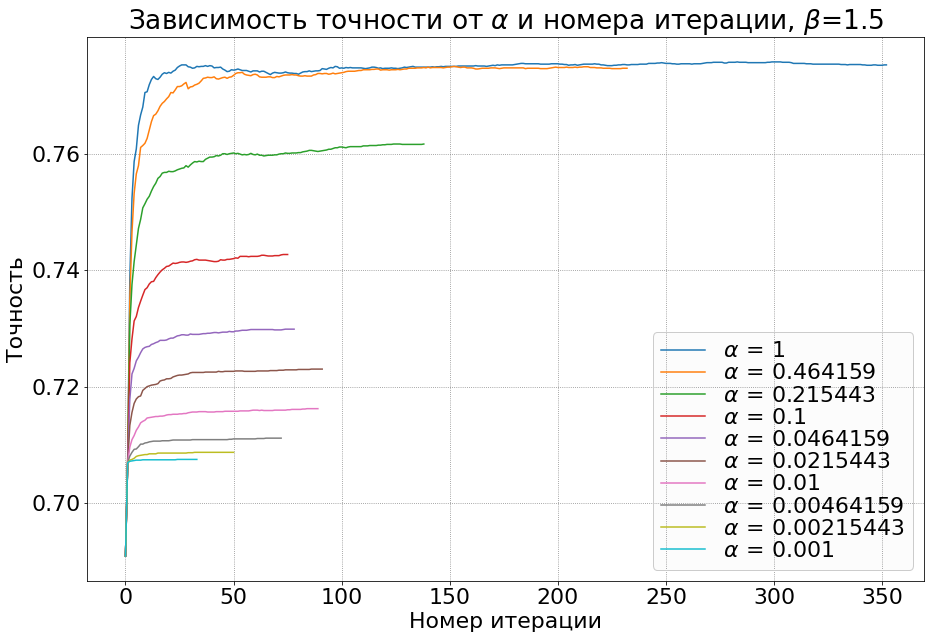

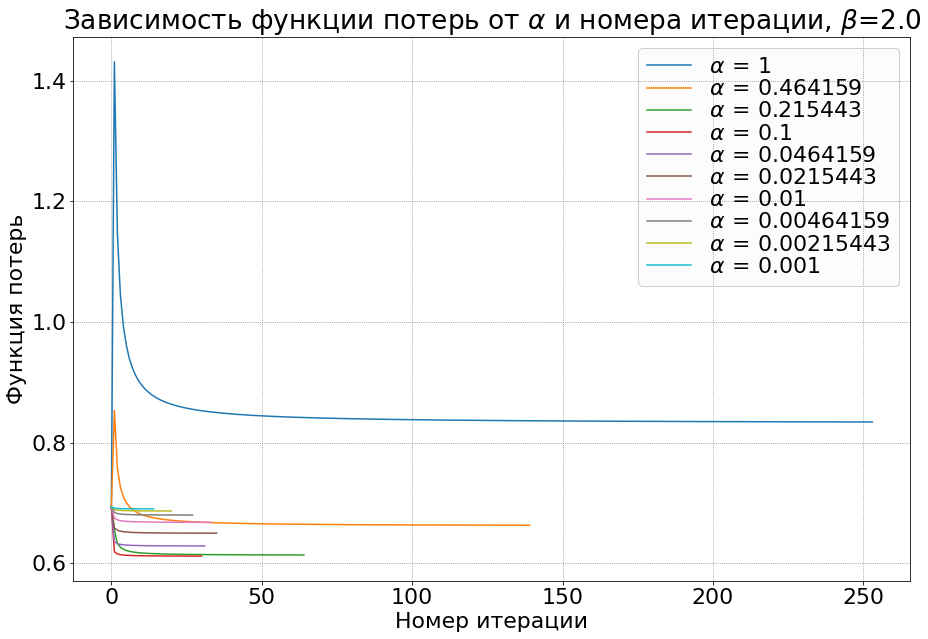

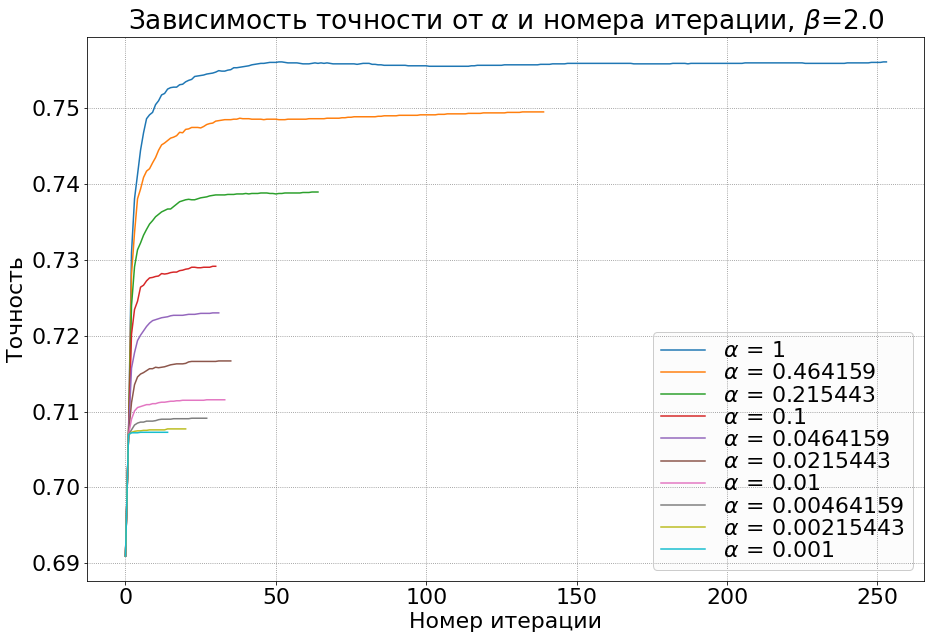

In [21]:
for i, beta in enumerate(betas):
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость функции потерь от $\alpha$ и номера итерации'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = np.arange(len(results[(alpha, beta)]['func']))
        y = results[(alpha, beta)]['func']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Номер итерации')
        plt.ylabel('Функция потерь')
    legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_gd_{i}_func.pdf', format='pdf')
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость точности от $\alpha$ и номера итерации'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = np.arange(len(results[(alpha, beta)]['accuracy']))
        y = results[(alpha, beta)]['accuracy']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Номер итерации')
        plt.ylabel('Точность')
    legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_gd_{i}_acc.pdf', format='pdf')
    plt.show()

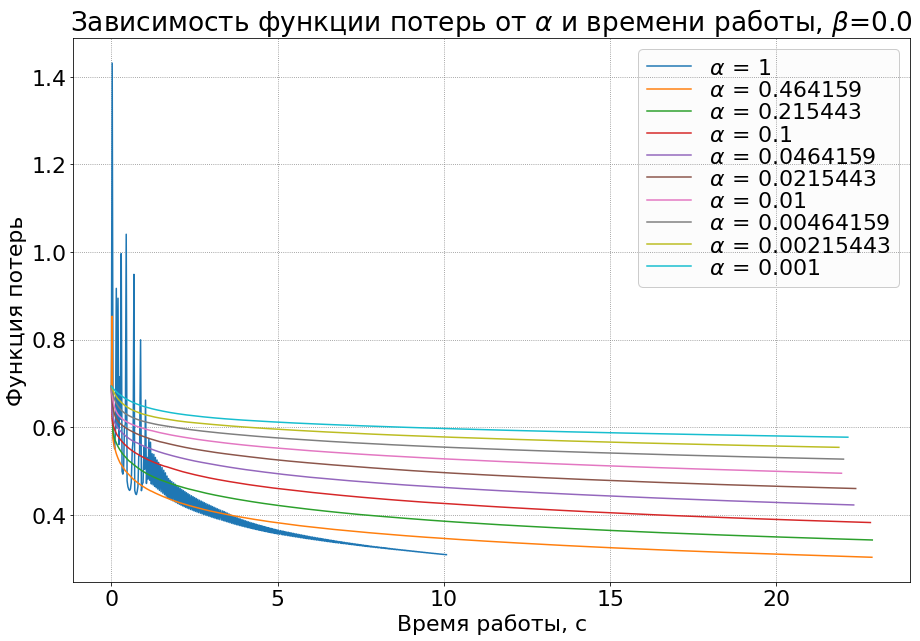

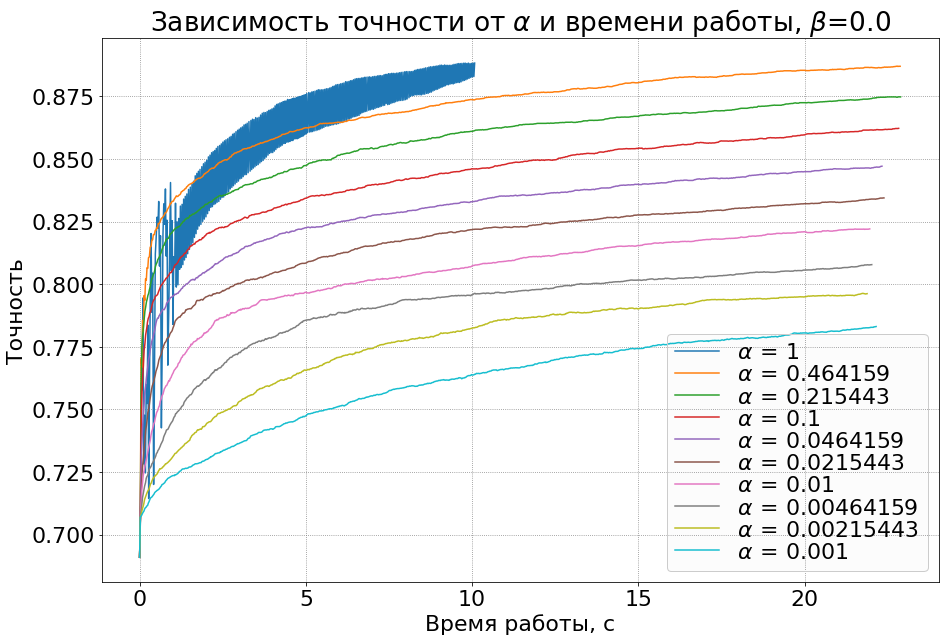

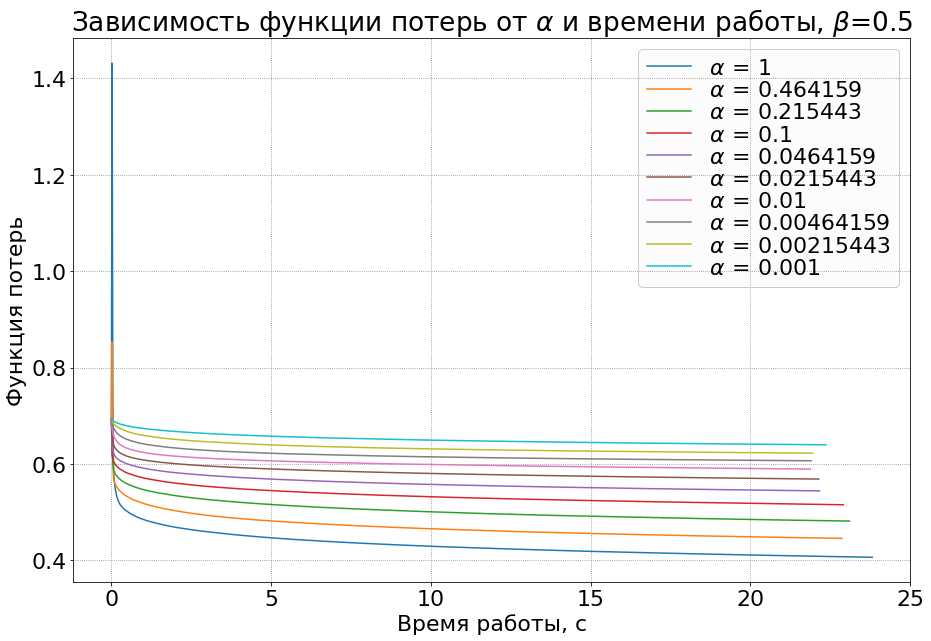

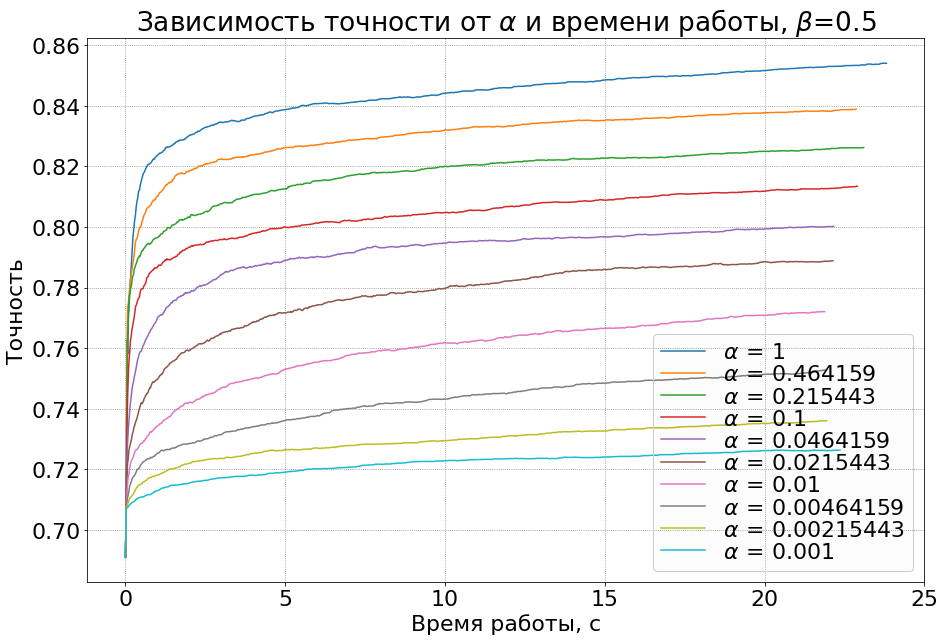

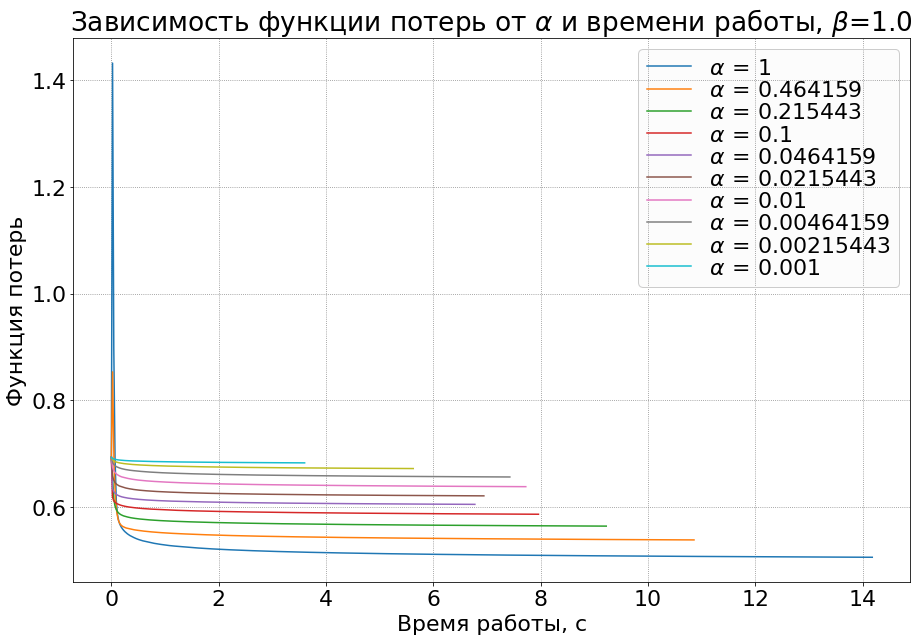

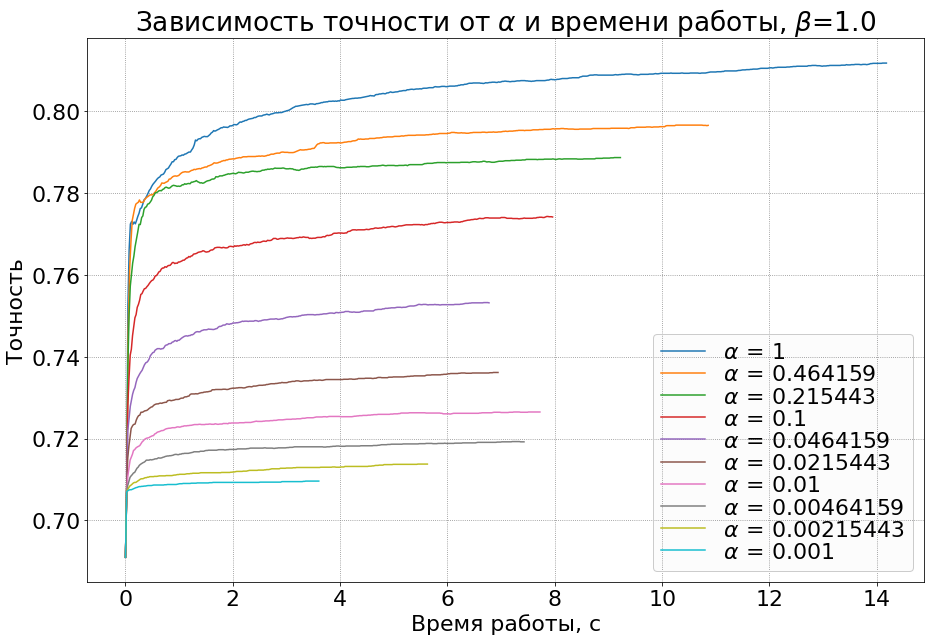

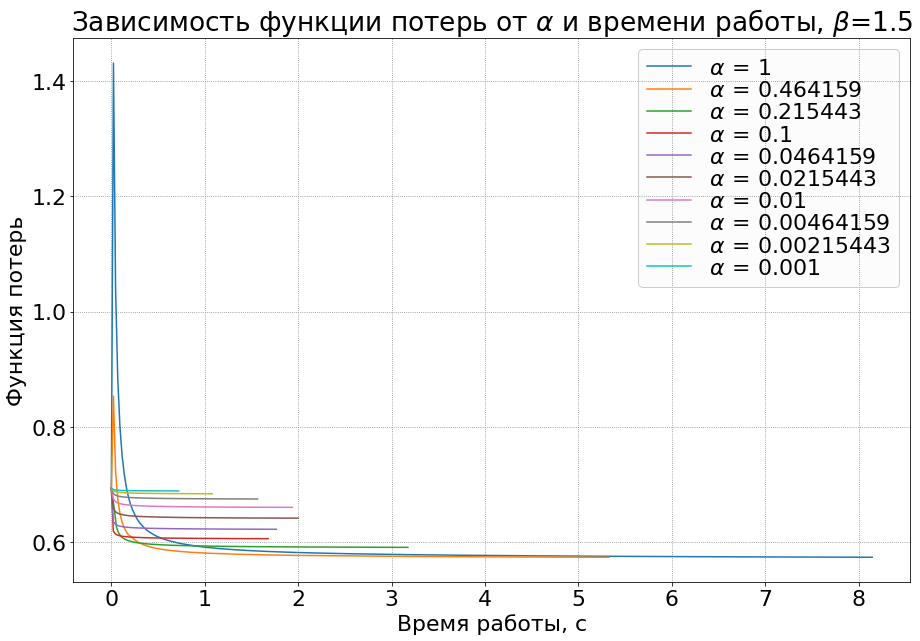

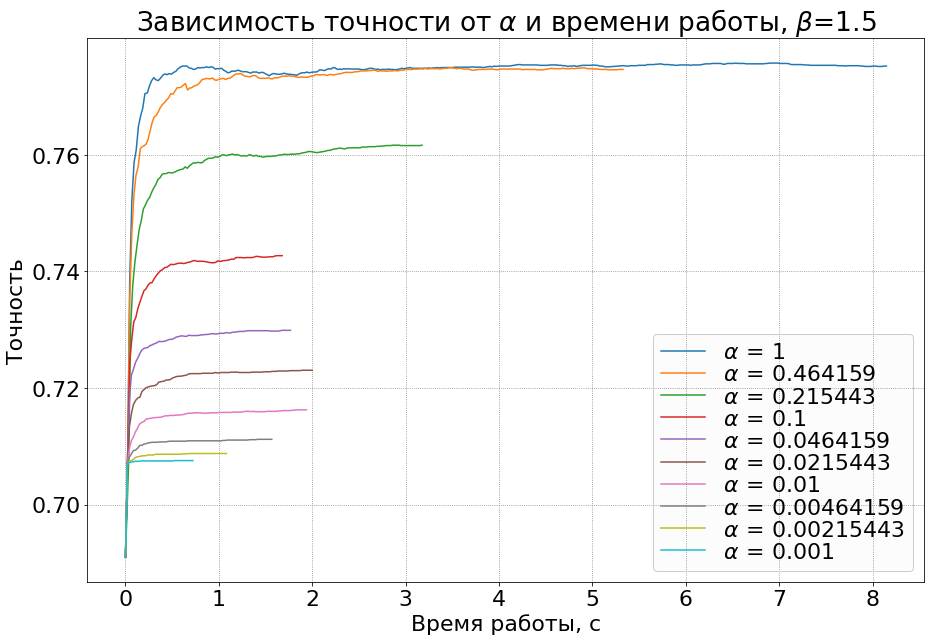

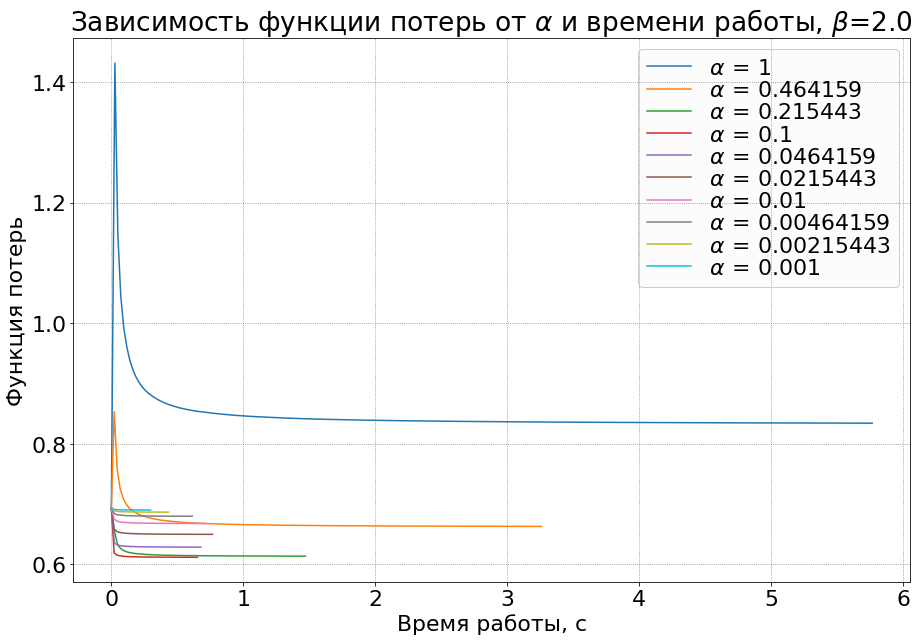

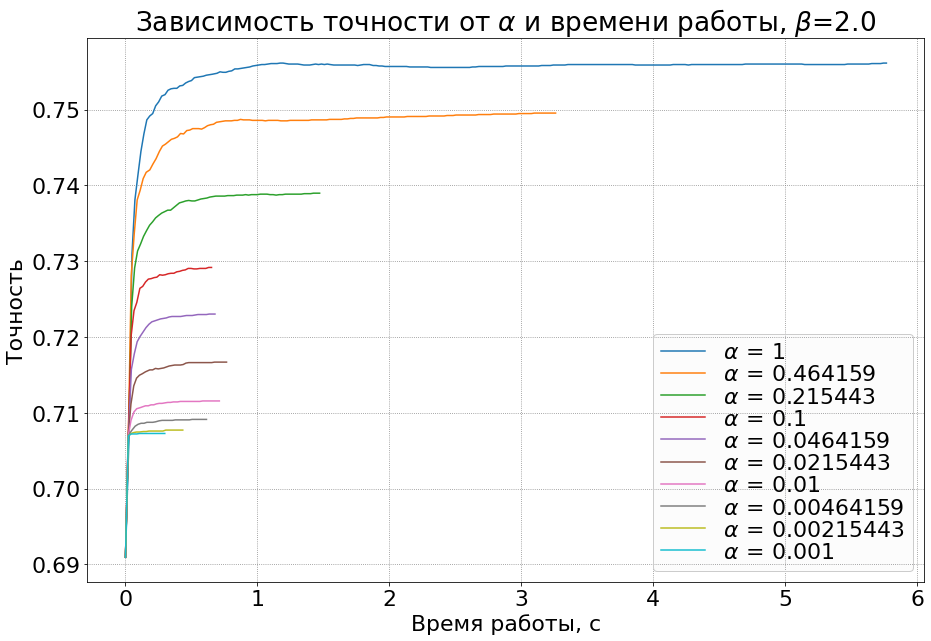

In [22]:
for i, beta in enumerate(betas):
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость функции потерь от $\alpha$ и времени работы'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = np.cumsum(results[(alpha, beta)]['time'])
        y = results[(alpha, beta)]['func']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Время работы, с')
        plt.ylabel('Функция потерь')
    legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_gd_{i}_func_t.pdf', format='pdf')
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость точности от $\alpha$ и времени работы'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = np.cumsum(results[(alpha, beta)]['time'])
        y = results[(alpha, beta)]['accuracy']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Время работы, с')
        plt.ylabel('Точность')
    legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_gd_{i}_acc_t.pdf', format='pdf')
    plt.show()

In [23]:
stochastic_results = {}
y_train_tt = y_train_t.values.reshape((y_train_t.shape[0]), 1)
for alpha in alphas:
    for beta in betas:
        clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=alpha, step_beta=beta, tolerance=1e-5, max_iter=2000, random_seed=153, **args)
        stochastic_results[(alpha, beta)] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, log_freq=1, X_val=X_val, y_val=y_val)


In [25]:
stochastic_results

{(0.001,
  0.0): {'accuracy': [0.6909533260772136,
   0.722709520455855,
   0.7284077085600871,
   0.7332735770535885,
   0.7382674947179717,
   0.7424290927716243,
   0.7470388629233625,
   0.750240092195403,
   0.7532492477111211,
   0.7561303540559575,
   0.759331583327998,
   0.7617004929893079,
   0.7628529355272424,
   0.7651578206031115,
   0.7665663614828094,
   0.7688072219732377,
   0.7707919841219029,
   0.7722005250016006,
   0.7739932133939432,
   0.7748895575901146,
   0.7766182213970164,
   0.777450541007747,
   0.7783468852039183,
   0.7787950573020039,
   0.780459696523465,
   0.7807157948652282,
   0.7812920161341955,
   0.7827645815993342,
   0.784493245406236,
   0.7859017862859338,
   0.7863499583840194,
   0.7866700813112235,
   0.7870542288238683,
   0.7880786221909213,
   0.7883347205326845,
   0.7887828926307702,
   0.7887828926307702,
   0.7897432614123824,
   0.789871310583264,
   0.7902554580959088,
   0.7902554580959088,
   0.7905755810231129,
   0.79108777

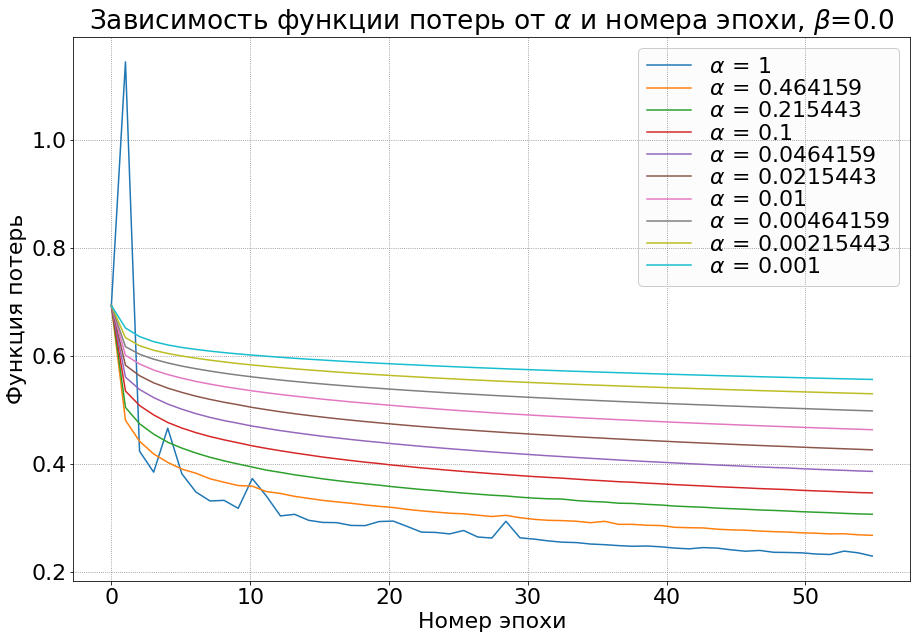

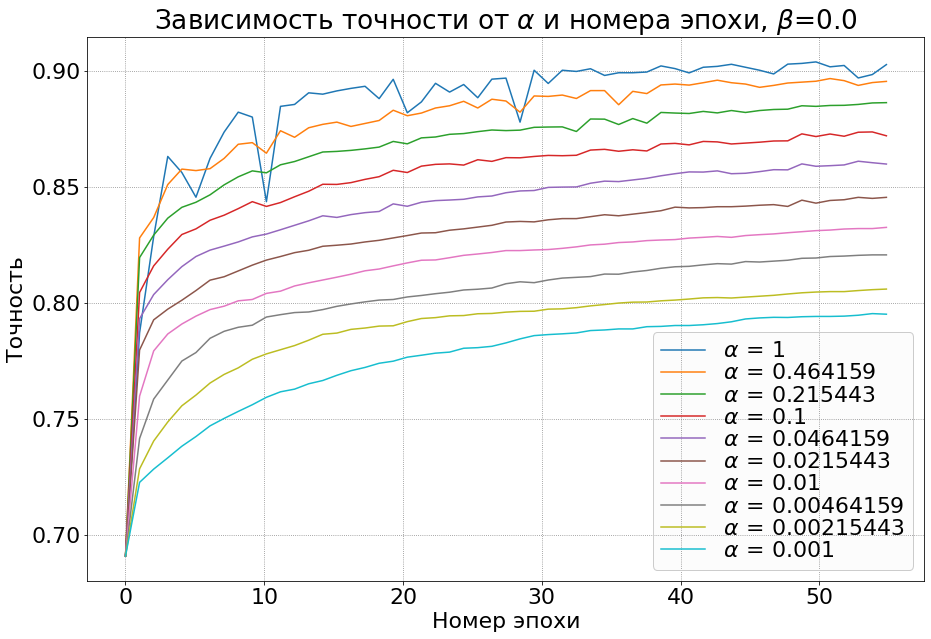

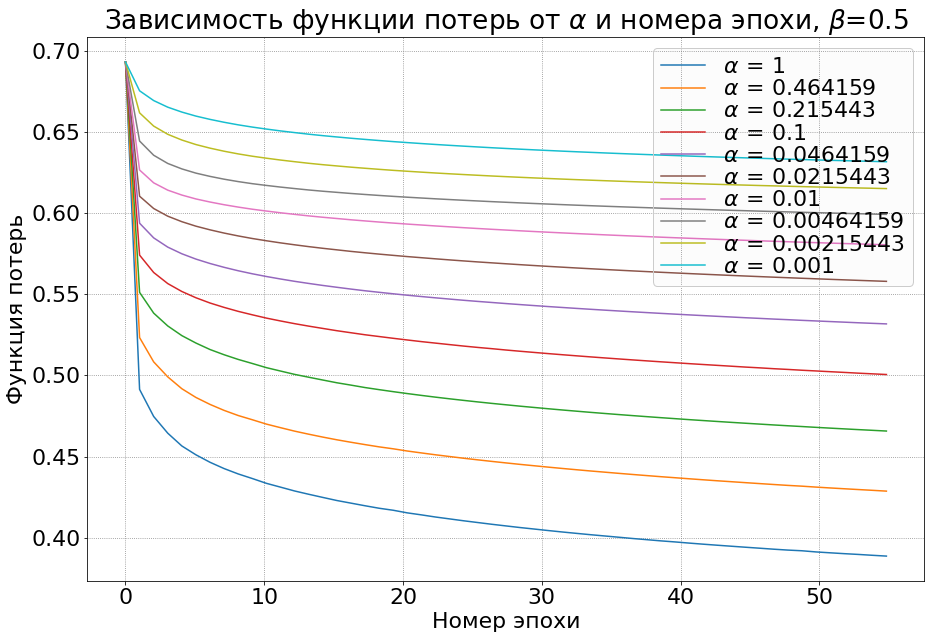

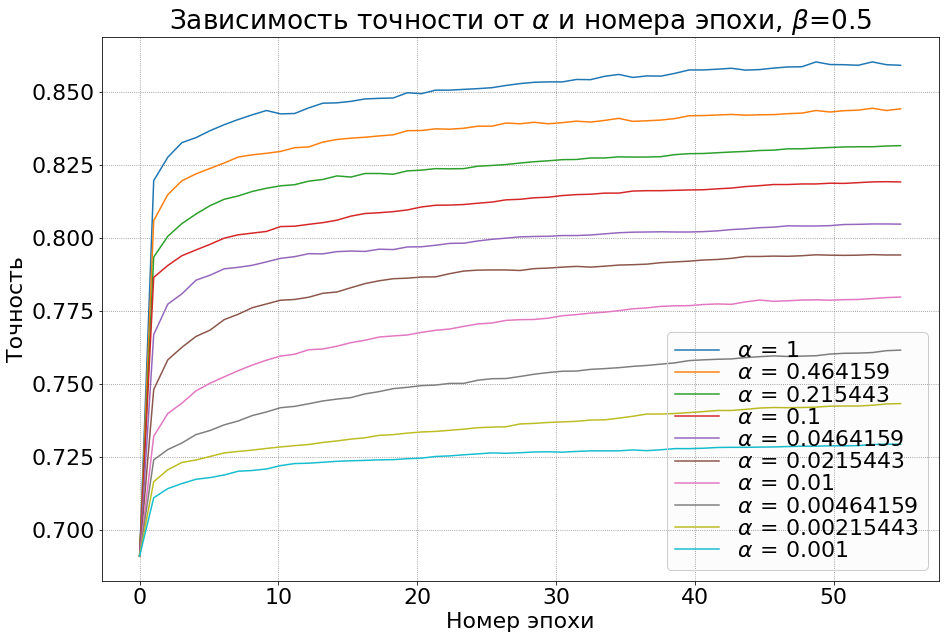

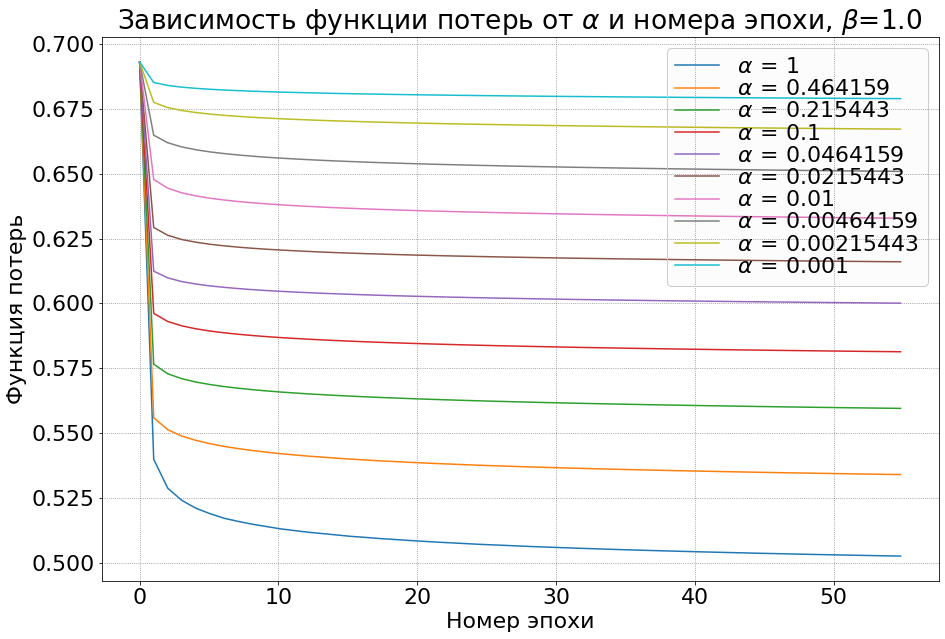

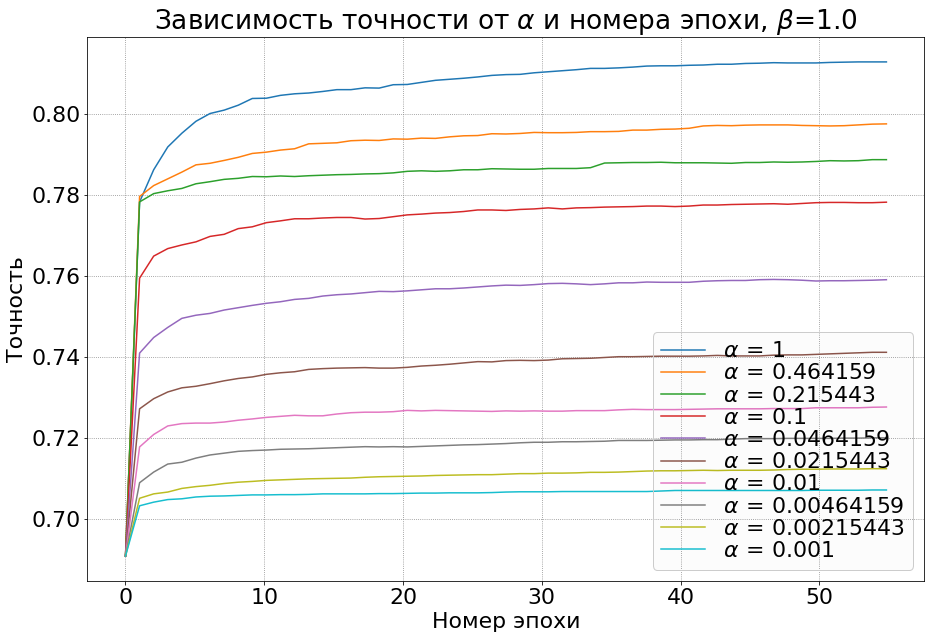

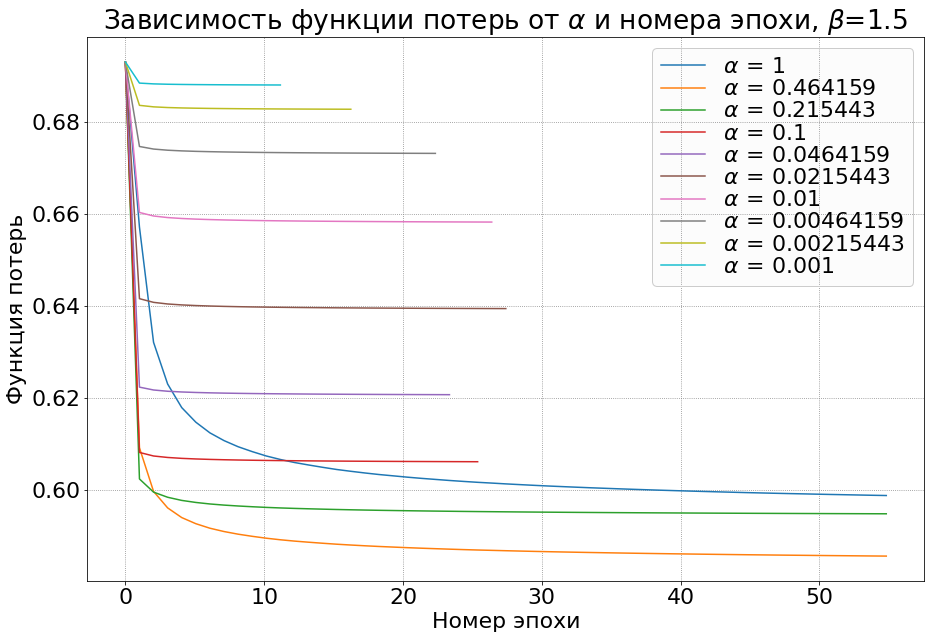

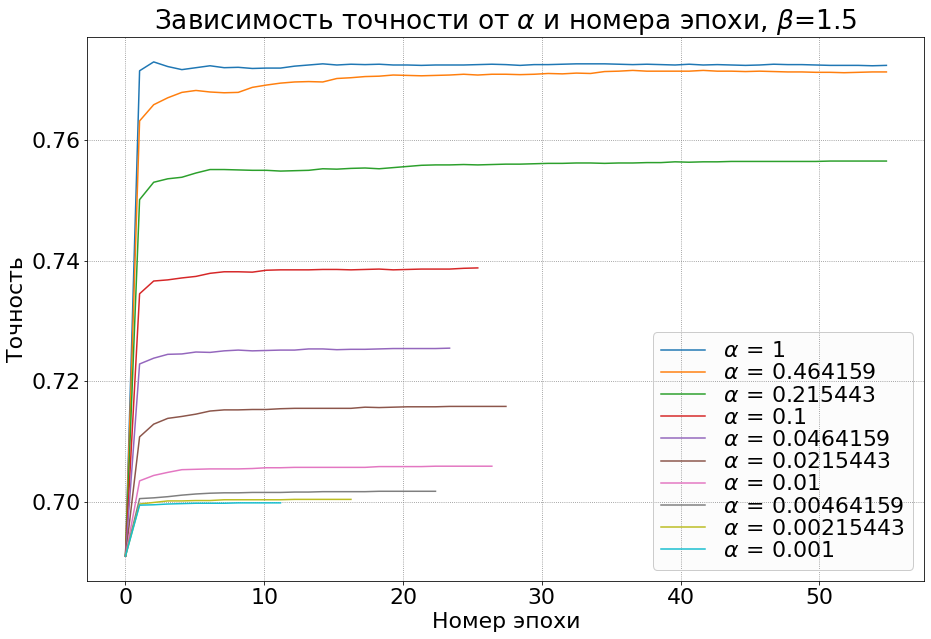

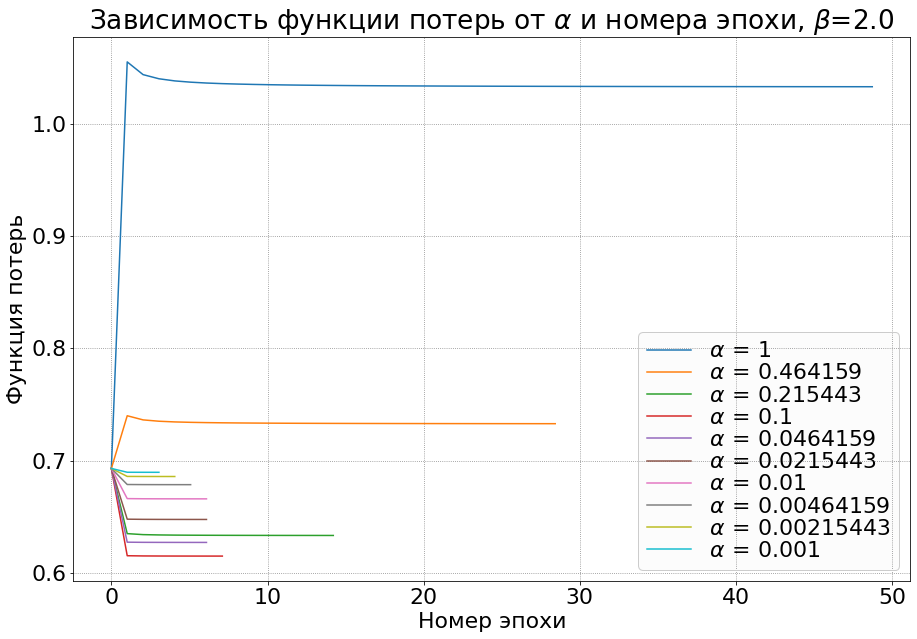

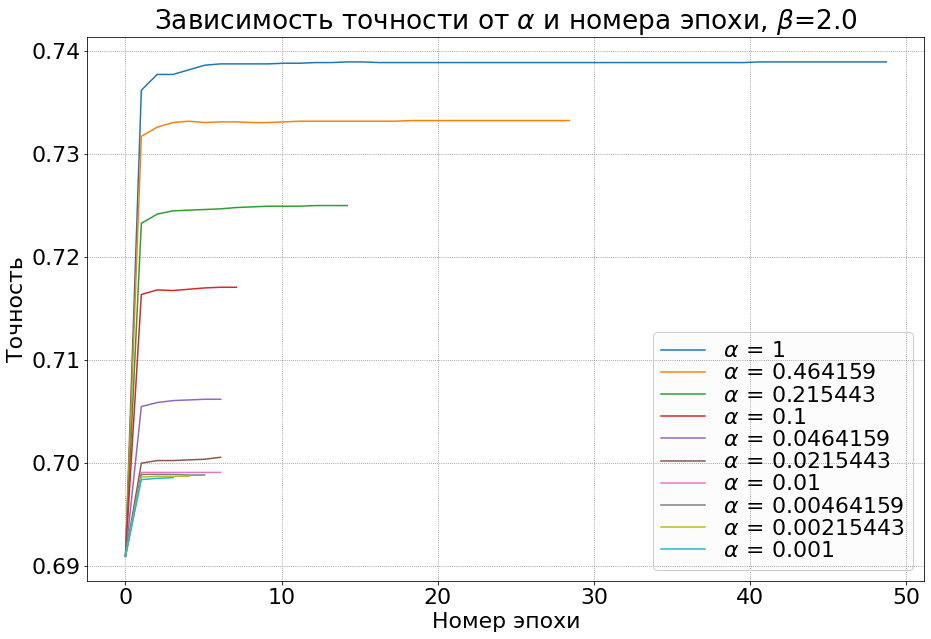

In [26]:
for i, beta in enumerate(betas):
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость функции потерь от $\alpha$ и номера эпохи'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = stochastic_results[(alpha, beta)]['epoch_num']
        y = stochastic_results[(alpha, beta)]['func']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Номер эпохи')
        plt.ylabel('Функция потерь')
    if beta == 0.5 or beta == 1:
        legend = plt.legend(labelspacing=0.1, loc='upper right')
    else:
        legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))

    plt.grid(True)
    plt.savefig(fname=f'eta_sgd_{i}_func.pdf', format='pdf')
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость точности от $\alpha$ и номера эпохи'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = stochastic_results[(alpha, beta)]['epoch_num']
        y = stochastic_results[(alpha, beta)]['accuracy']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Номер эпохи')
        plt.ylabel('Точность')
    if beta == 0.5 or beta == 1:
        legend = plt.legend(labelspacing=0.1, loc='lower right')
    else:
        legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_sgd_{i}_acc.pdf', format='pdf')
    plt.show()

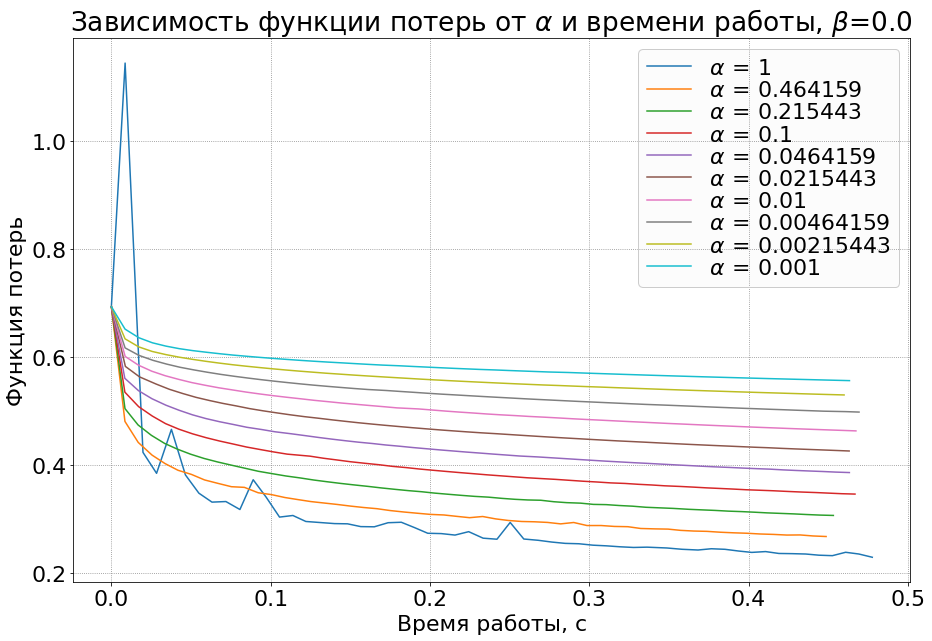

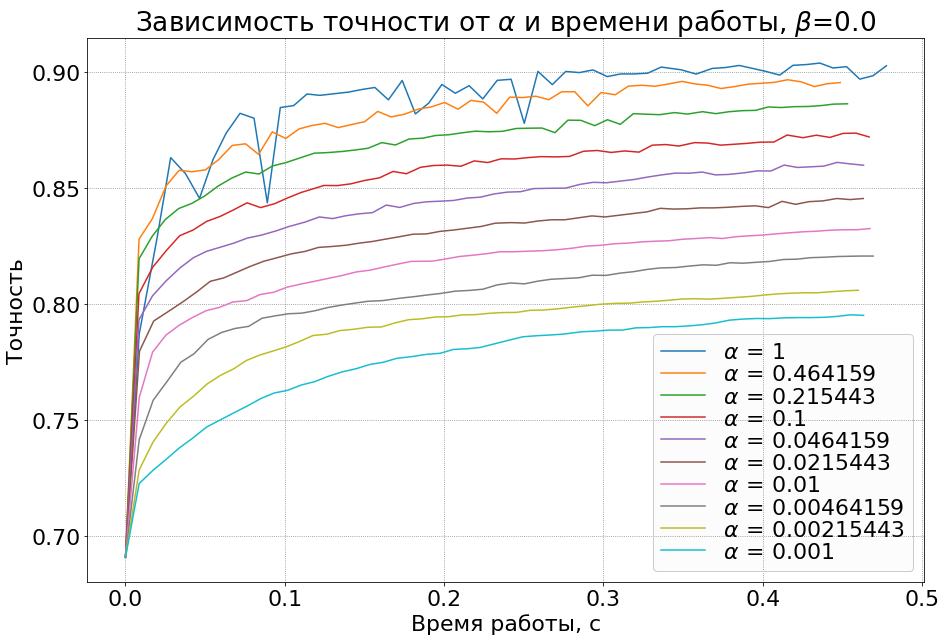

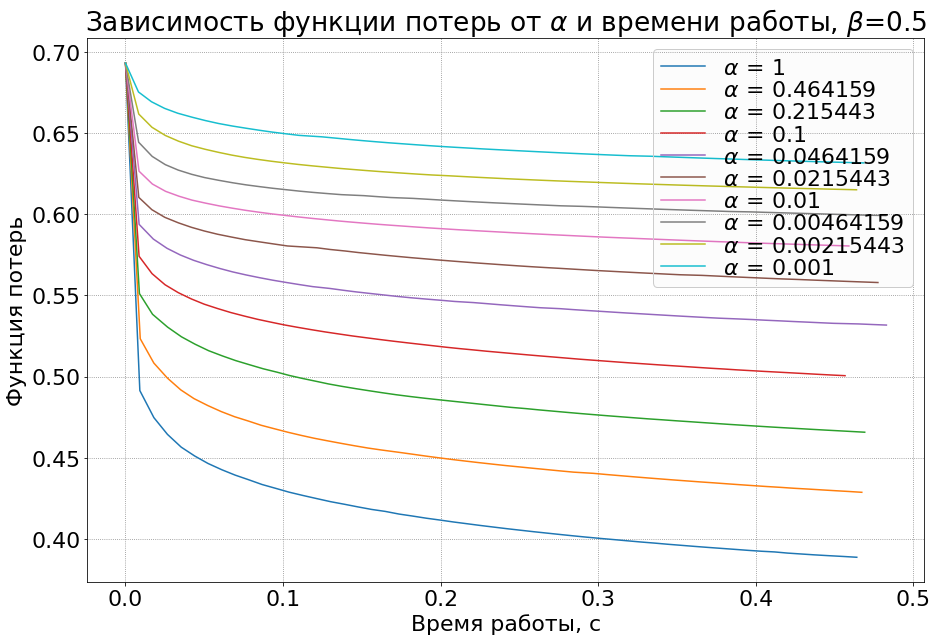

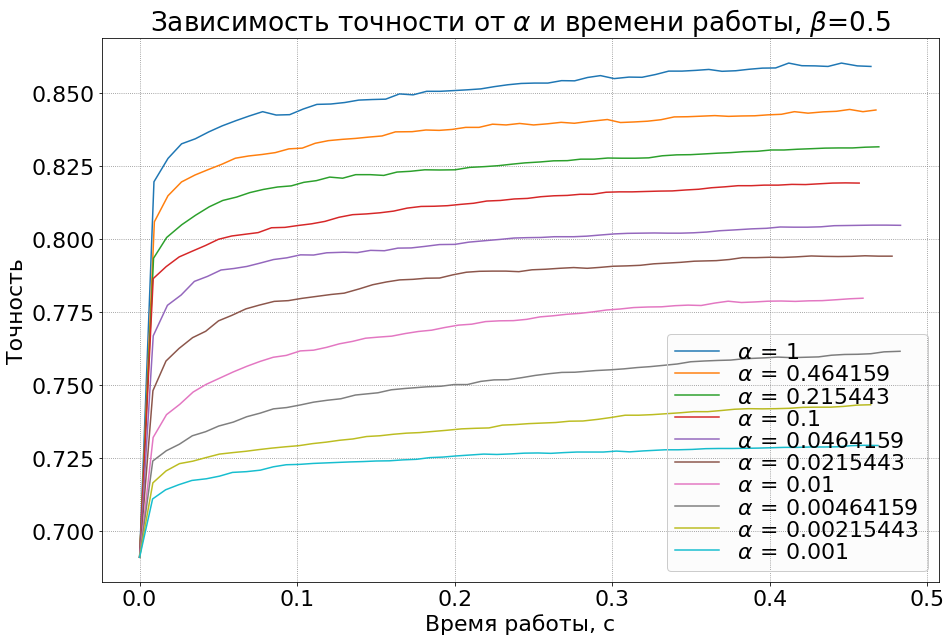

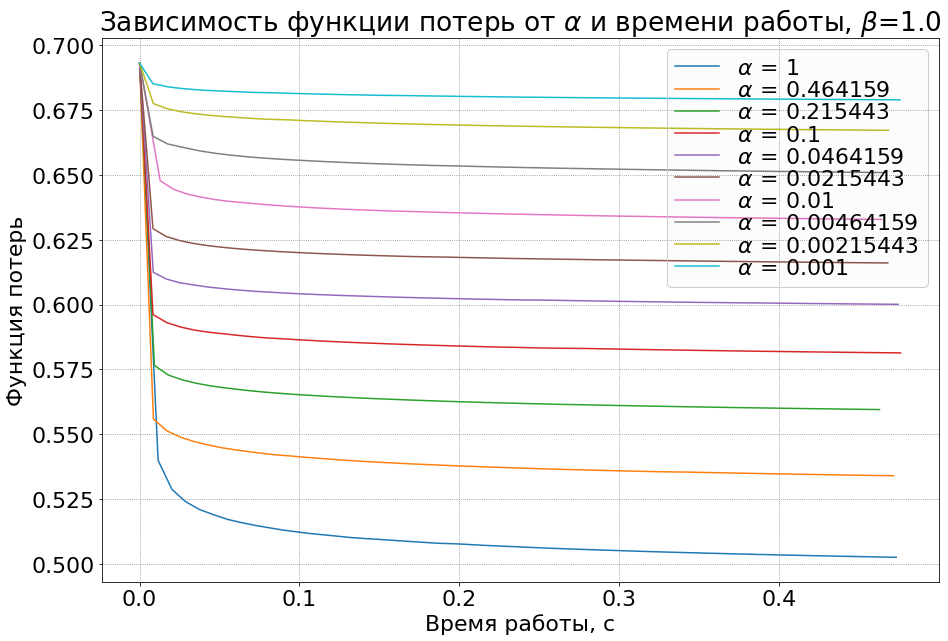

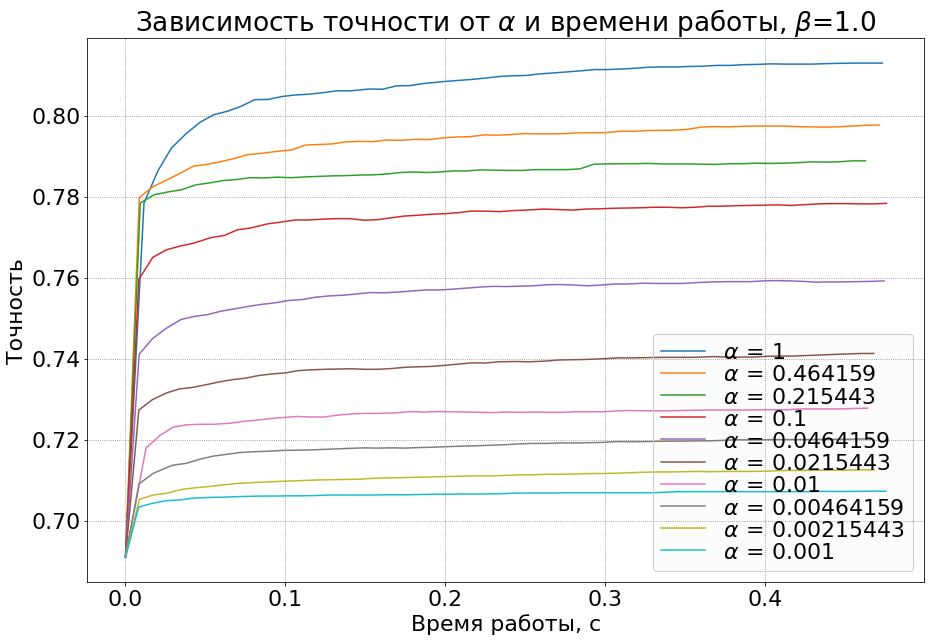

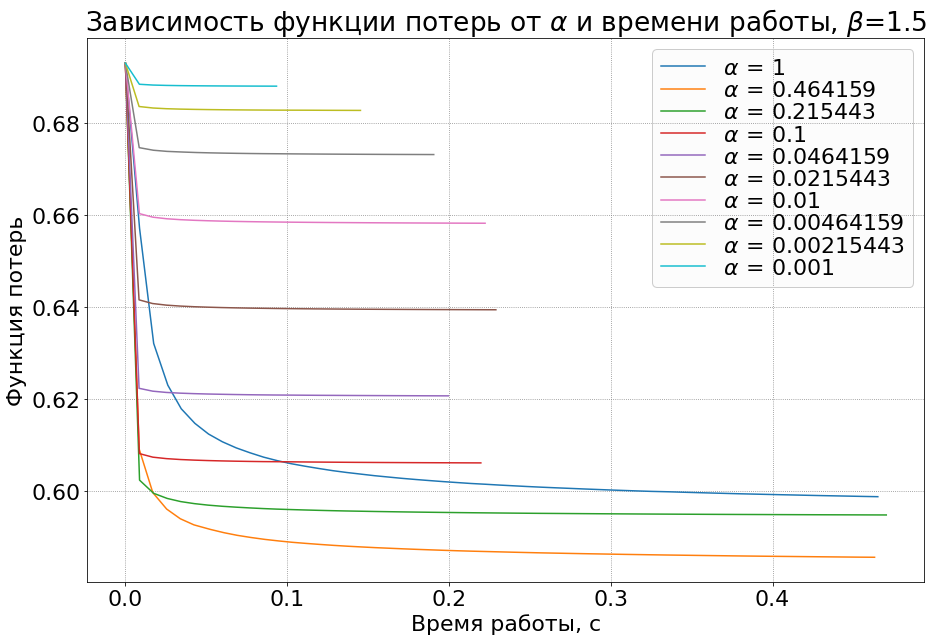

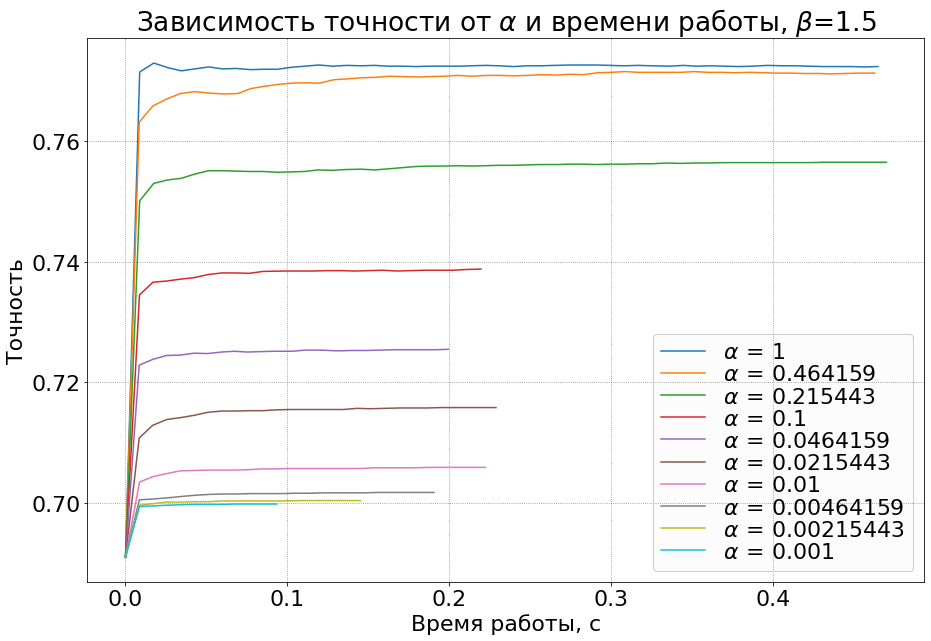

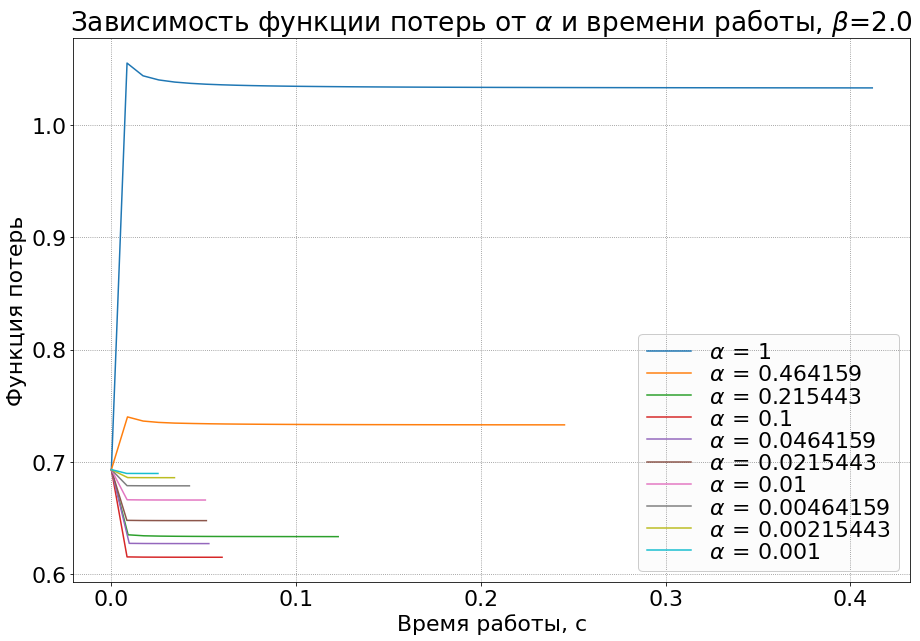

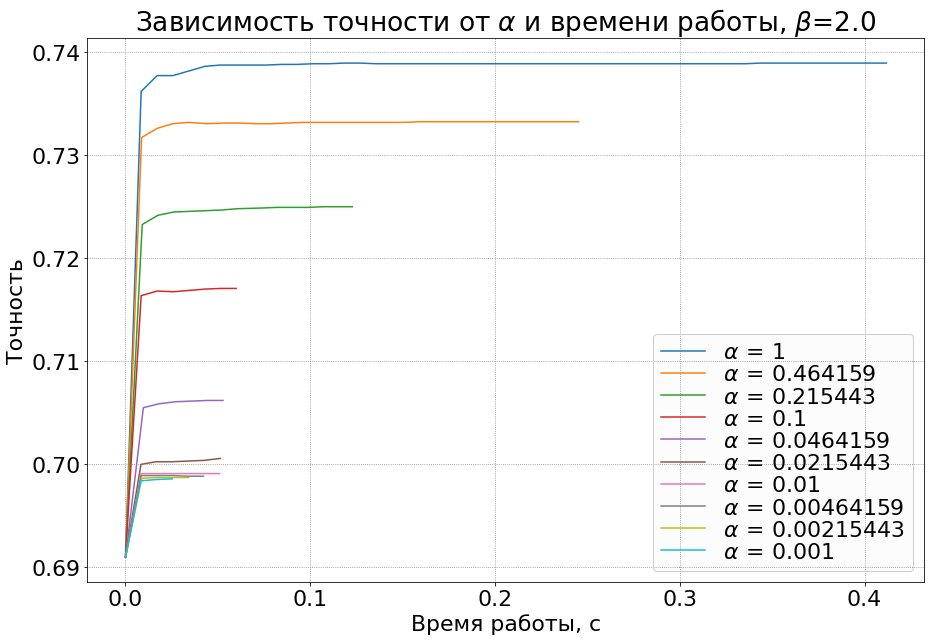

In [27]:
for i, beta in enumerate(betas):
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость функции потерь от $\alpha$ и времени работы'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = np.cumsum(stochastic_results[(alpha, beta)]['time'])
        y = stochastic_results[(alpha, beta)]['func']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Время работы, с')
        plt.ylabel('Функция потерь')
    if beta == 0.5 or beta == 1:
        legend = plt.legend(labelspacing=0.1, loc='upper right')
    else:
        legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_sgd_{i}_func_t.pdf', format='pdf')
    plt.figure(figsize=(15, 10))
    plt.title(r'Зависимость точности от $\alpha$ и времени работы'+', '+r'$\beta$=' + str(beta))
    for alpha in alphas:
        x = np.cumsum(stochastic_results[(alpha, beta)]['time'])
        y = stochastic_results[(alpha, beta)]['accuracy']
        plt.plot(x, y, label=f'$\\alpha\,=\,${alpha:g}')
        plt.xlabel('Время работы, с')
        plt.ylabel('Точность')
    if beta == 0.5 or beta == 1:
        legend = plt.legend(labelspacing=0.1, loc='lower right')
    else:
        legend = plt.legend(labelspacing=0.1)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
    plt.grid(True)
    plt.savefig(fname=f'eta_sgd_{i}_acc_t.pdf', format='pdf')
    plt.show()

Сравнение, выводы

# Исследование зависимости от начального приближения

In [28]:
feature_num = X_train_t.shape[1]
init_w = [np.zeros(feature_num), np.random.uniform(-1 / feature_num, 1 / feature_num, feature_num),
          np.random.uniform(-1 / np.sqrt(feature_num), 1 / np.sqrt(feature_num), feature_num), 
          (X_train_t.T.dot(y_train_t)) / np.reshape(np.array(X_train_t.power(2).sum(axis=0) + 1e-5), (X_train_t.shape[1], ))]

In [29]:
clf = GDClassifier(loss_function='binary_logistic', step_alpha=1, step_beta=0, tolerance=1e-5, max_iter=1000, **args)
results = {}
for idx, w in enumerate(init_w):
    results[idx] = clf.fit(X_train_t, y_train_t, w_0=w, trace=True, X_val=X_val, y_val=y_val)

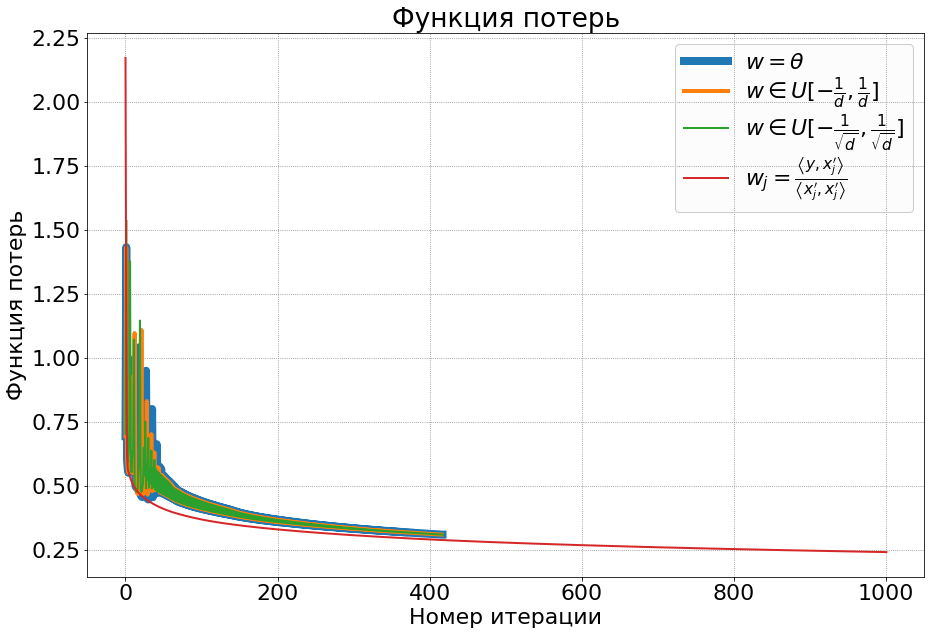

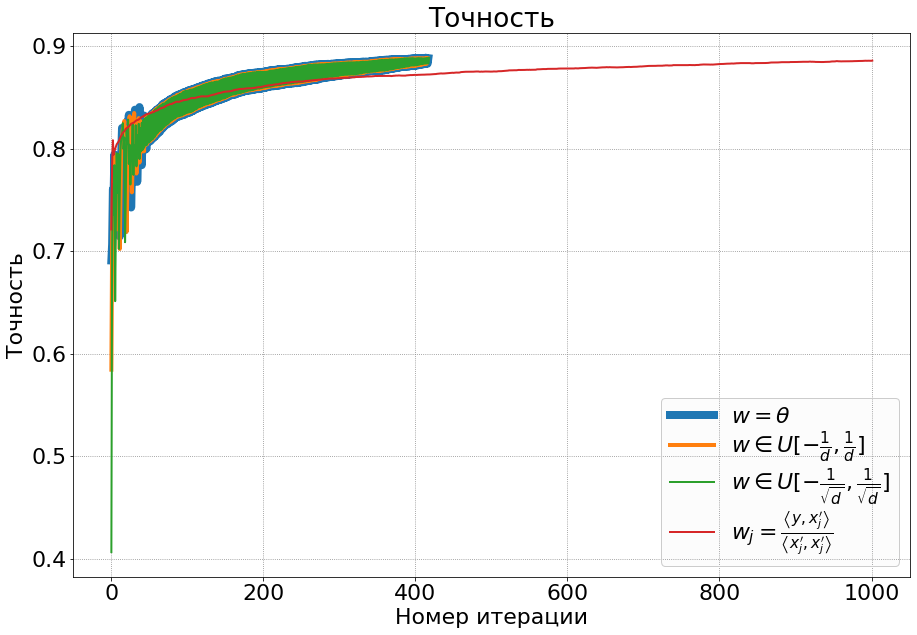

In [30]:
labels = [r'$w=\theta$', r'$w\in U[-\frac{1}{d},\frac{1}{d}]$', r'$w\in U[-\frac{1}{\sqrt{d}},\frac{1}{\sqrt{d}}]$', r"${w}_j=\frac{\left<{y}, {x}_j'\right>}{\left<{x}_j',{x}_j'\right>}$",]


plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for idx, label in zip(range(4), labels):
    x = np.arange(len(results[idx]['func']))
    y = results[idx]['func']


    if idx == 0:
        lw = 8
    elif idx == 1:
        lw = 4
    else:
        lw = 2
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Номер итерации')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'w_gd_func.pdf', format='pdf')
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for idx, label in zip(range(4), labels):
    x = np.arange(len(results[idx]['accuracy']))
    y = results[idx]['accuracy']

    if idx == 0:
        lw = 8
    elif idx == 1:
        lw = 4
    else:
        lw = 2
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Номер итерации')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'w_gd_acc.pdf', format='pdf')
plt.show()

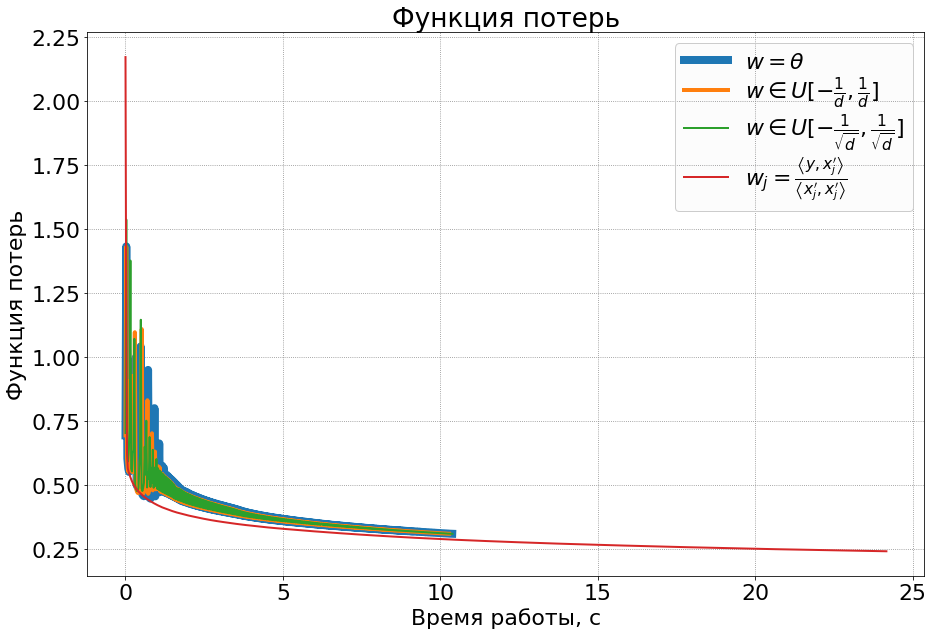

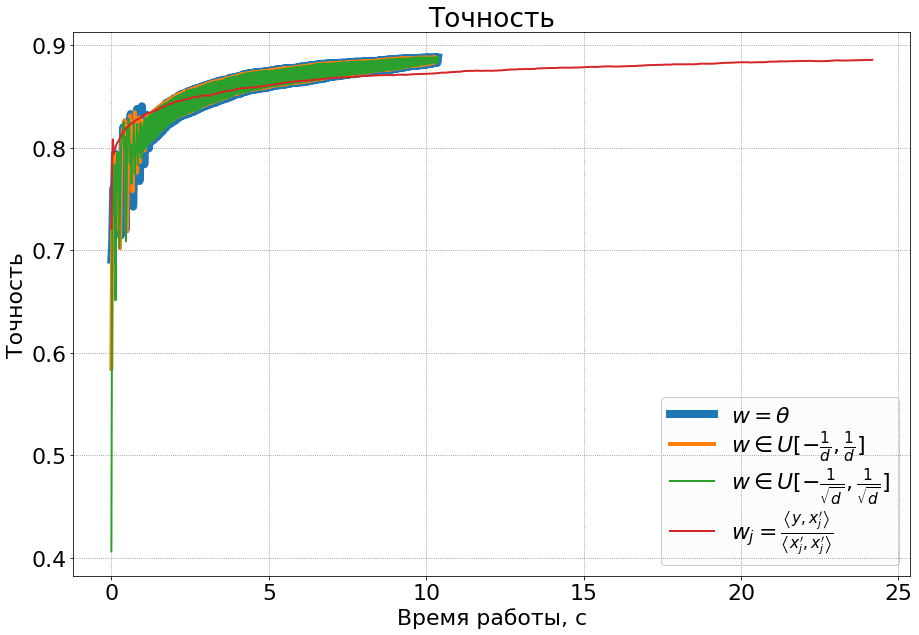

In [31]:
labels = [r'$w=\theta$', r'$w\in U[-\frac{1}{d},\frac{1}{d}]$', r'$w\in U[-\frac{1}{\sqrt{d}},\frac{1}{\sqrt{d}}]$', r"${w}_j=\frac{\left<{y}, {x}_j'\right>}{\left<{x}_j',{x}_j'\right>}$",]


plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for idx, label in zip(range(4), labels):
    x = np.cumsum(results[idx]['time'])
    y = results[idx]['func']


    if idx == 0:
        lw = 8
    elif idx == 1:
        lw = 4
    else:
        lw = 2
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Время работы, с')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for idx, label in zip(range(4), labels):
    x = np.cumsum(results[idx]['time'])
    y = results[idx]['accuracy']

    if idx == 0:
        lw = 8
    elif idx == 1:
        lw = 4
    else:
        lw = 2
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Время работы, с')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.show()

In [32]:
results[0]

{'accuracy': [0.6909533260772136,
  0.706959472437416,
  0.7604840258659326,
  0.7577949932774185,
  0.7944810807350022,
  0.7282156348037646,
  0.7476791087777707,
  0.7246302580190793,
  0.7599078045969653,
  0.7523529035149498,
  0.7836609257955055,
  0.7143863243485499,
  0.7611242717203406,
  0.7951213265894104,
  0.8202189640822075,
  0.7887828926307702,
  0.8044048914783277,
  0.7200204878673411,
  0.762980984698124,
  0.812023817145784,
  0.8186183494461874,
  0.8267494717971701,
  0.8222677508163134,
  0.8330238811703694,
  0.8072219732377233,
  0.8193226198860363,
  0.7426211665279467,
  0.7735450412958577,
  0.8199628657404443,
  0.8320635123887573,
  0.8239323900377745,
  0.8380177988347526,
  0.8111914975350535,
  0.8255330046737948,
  0.7676547794353031,
  0.7908957039503169,
  0.8154171201741469,
  0.8405787822523849,
  0.805301235674499,
  0.8253409309174723,
  0.7839170241372687,
  0.8109353991932903,
  0.8067097765541968,
  0.8323196107305205,
  0.7988347525449773,
  

In [33]:
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1, step_beta=0, tolerance=1e-5, max_iter=2000, random_seed=153, **args)
results = {}
for idx, w in enumerate(init_w):
    results[idx] = clf.fit(X_train_t, y_train_t.values, w_0=w, trace=True, log_freq=1e-10, X_val=X_val, y_val=y_val)

In [34]:
results[0]

{'accuracy': [0.6909533260772136,
  0.6972277354504129,
  0.7634931813816506,
  0.6620782380434087,
  0.7419809206735386,
  0.7543376656636148,
  0.7759139509571675,
  0.7595876816697612,
  0.7944810807350022,
  0.7239259875792304,
  0.7490876496574684,
  0.7600998783532876,
  0.7954414495166143,
  0.7734810167104168,
  0.8145848005634163,
  0.8037646456239196,
  0.814392726807094,
  0.725078430117165,
  0.7504961905371663,
  0.8137524809526858,
  0.8216915295473461,
  0.8024841539151034,
  0.8238683654523337,
  0.6654075164863308,
  0.7520327805877457,
  0.8185543248607465,
  0.8045969652346501,
  0.8295025289711249,
  0.6398617068954479,
  0.7558742557141942,
  0.8200909149113259,
  0.7753377296882003,
  0.8115116204622576,
  0.8000512196683527,
  0.8262372751136436,
  0.5977975542608361,
  0.7367309046673923,
  0.7871182534093092,
  0.8158652922722326,
  0.816377488955759,
  0.8018439080606953,
  0.8234842179396888,
  0.8239323900377745,
  0.8353927908316794,
  0.8211153082783789,
 

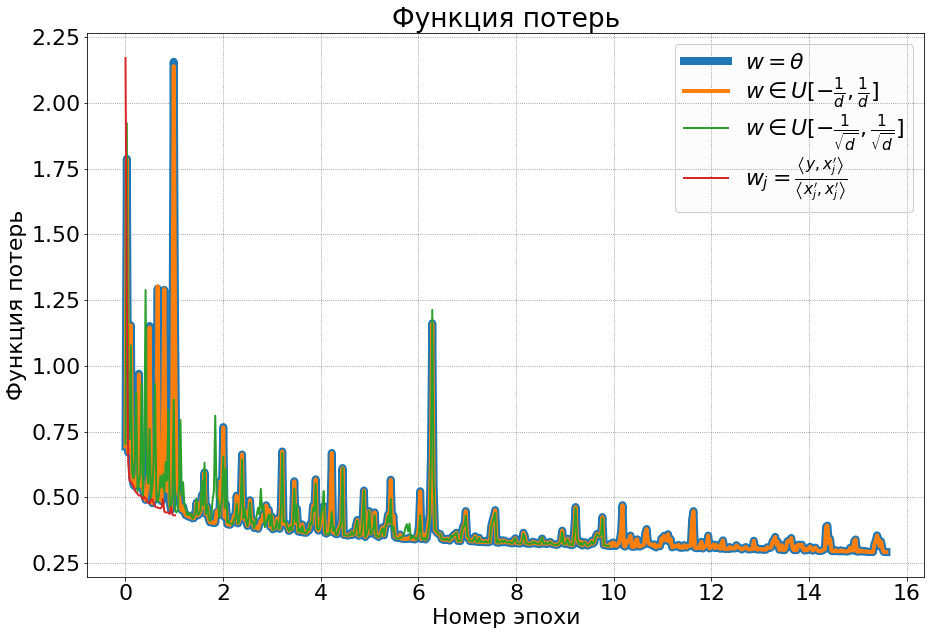

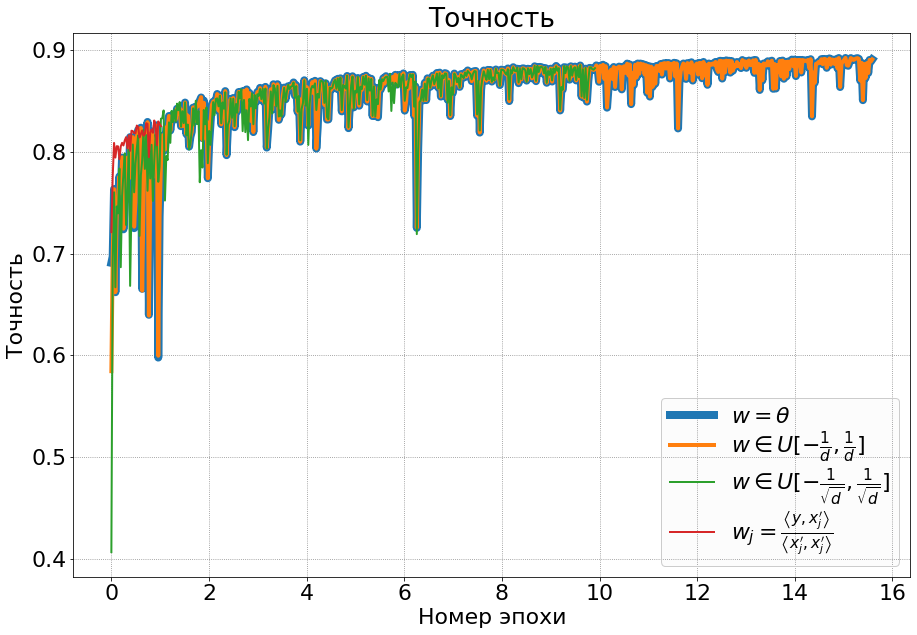

In [35]:
labels = [r'$w=\theta$', r'$w\in U[-\frac{1}{d},\frac{1}{d}]$', r'$w\in U[-\frac{1}{\sqrt{d}},\frac{1}{\sqrt{d}}]$', r"${w}_j=\frac{\left<{y}, {x}_j'\right>}{\left<{x}_j',{x}_j'\right>}$",]


plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for idx, label in zip(range(4), labels):
    x = results[idx]['epoch_num']
    y = results[idx]['func']

    if idx == 0:
        lw = 8
    elif idx == 1:
        lw = 4
    else:
        lw = 2
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Номер эпохи')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'w_sgd_func.pdf', format='pdf')
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for idx, label in zip(range(4), labels):
    x = results[idx]['epoch_num']
    y = results[idx]['accuracy']
    

    if idx == 0:
        lw = 8
    elif idx == 1:
        lw = 4
    else:
        lw = 2
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Номер эпохи')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'w_sgd_acc.pdf', format='pdf')
plt.show()

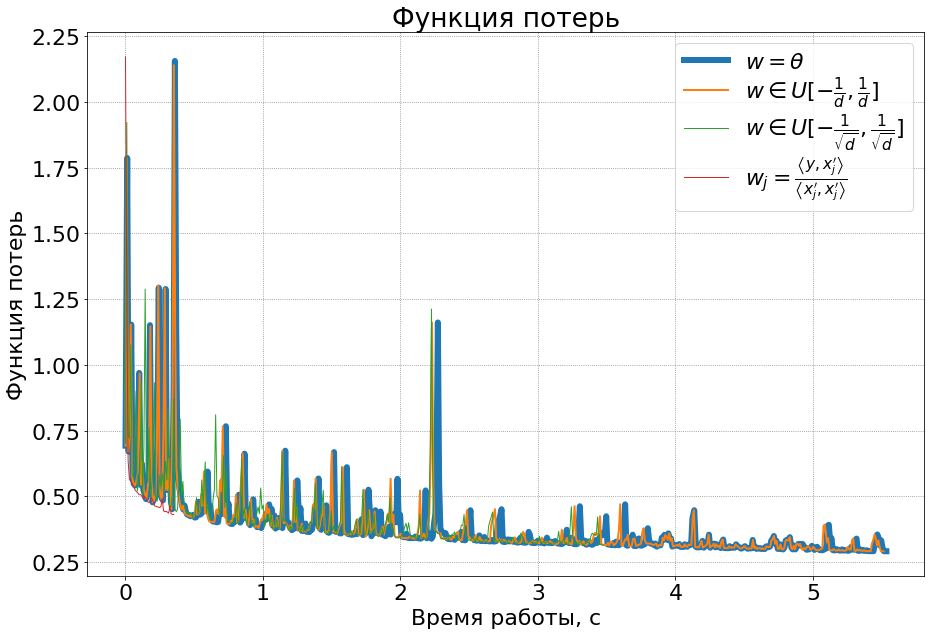

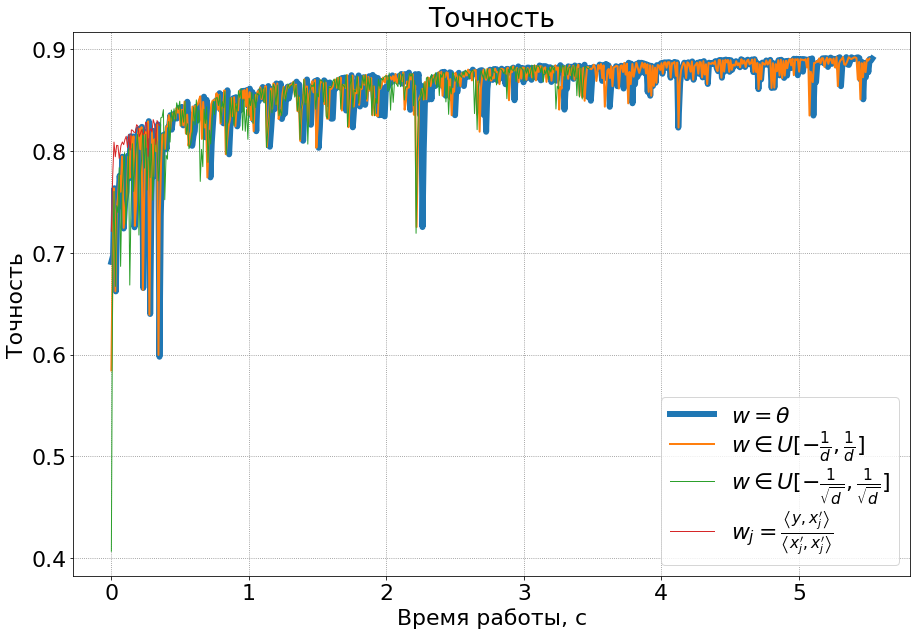

In [36]:
labels = [r'$w=\theta$', r'$w\in U[-\frac{1}{d},\frac{1}{d}]$', r'$w\in U[-\frac{1}{\sqrt{d}},\frac{1}{\sqrt{d}}]$', r"${w}_j=\frac{\left<{y}, {x}_j'\right>}{\left<{x}_j',{x}_j'\right>}$",]


plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for idx, label in zip(range(4), labels):
    x = np.cumsum(results[idx]['time'])
    y = results[idx]['func']


    if idx == 0:
        lw = 6
    elif idx == 1:
        lw = 2
    else:
        lw = 1
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Время работы, с')
    plt.ylabel('Функция потерь')
plt.legend(labelspacing=0.1)
plt.grid(True)
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for idx, label in zip(range(4), labels):
    x = np.cumsum(results[idx]['time'])
    y = results[idx]['accuracy']

    if idx == 0:
        lw = 6
    elif idx == 1:
        lw = 2
    else:
        lw = 1
    plt.plot(x, y, label=label, lw=lw)
    plt.xlabel('Время работы, с')
    plt.ylabel('Точность')
plt.legend(labelspacing=0.1)
plt.grid(True)
plt.show()

# Зависимость от размера подвыборки (батча)

In [ ]:
from optimization import *

In [86]:
batch_sizes = np.logspace(0, 4, 5).astype('int64')
results = {}
for batch_size in batch_sizes:
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=batch_size, step_alpha=1, step_beta=0, tolerance=1e-5, max_iter=1000, random_seed=153, **args)
    results[batch_size] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, log_freq=1e-4, X_val=X_val, y_val=y_val)

In [87]:
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1, step_alpha=1, step_beta=0, tolerance=1e-20, max_iter=1000, random_seed=153, **args)
results[1] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, log_freq=0.001, X_val=X_val, y_val=y_val)

In [39]:
results[1]

{'accuracy': [0.6909533260772136,
  0.3737115052180037,
  0.7462705678980729,
  0.705935079070363,
  0.7622767142582751,
  0.7469748383379218,
  0.747230936679685,
  0.7573468211793328,
  0.7490876496574684,
  0.7211089058198348,
  0.7287918560727319,
  0.7615724438184263,
  0.7612523208912222,
  0.7614443946475447,
  0.7567705999103655,
  0.7480632562904155,
  0.737499199692682,
  0.7451181253601383,
  0.6177732249183686,
  0.7694474678276458,
  0.7563224278122799,
  0.7796273769127345,
  0.7027978743837634,
  0.7052948332159549,
  0.7282796593892055,
  0.7560023048850759,
  0.7277034381202382,
  0.7698956399257315],
 'epoch_num': [0,
  0.0010153120026343224,
  0.0020306240052686453,
  0.0030459360079029755,
  0.004061248010537305,
  0.005076560013171636,
  0.006091872015805966,
  0.007107184018440296,
  0.008122496021074616,
  0.009137808023708914,
  0.010153120026343212,
  0.01116843202897751,
  0.012183744031611808,
  0.013199056034246107,
  0.014214368036880405,
  0.01522968003951

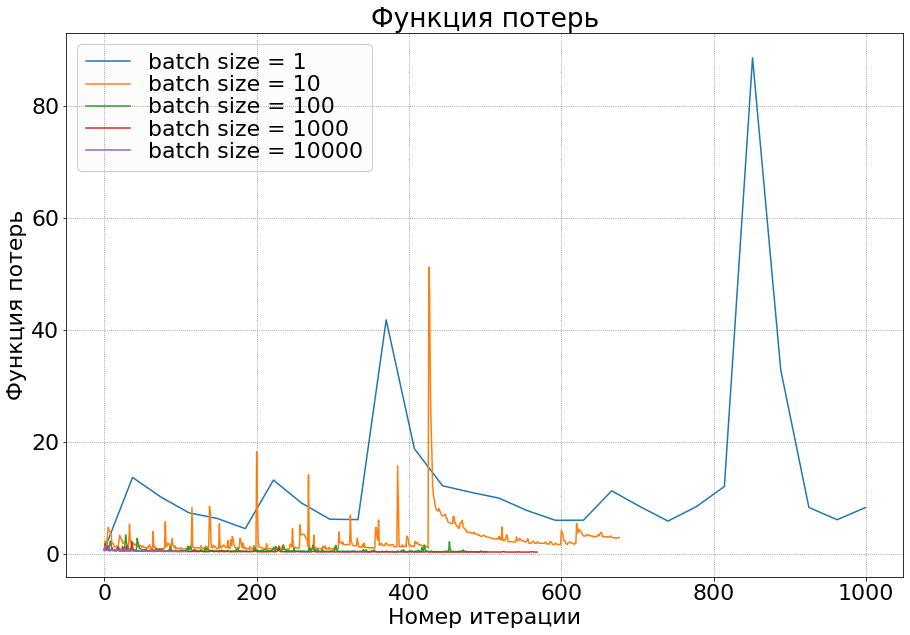

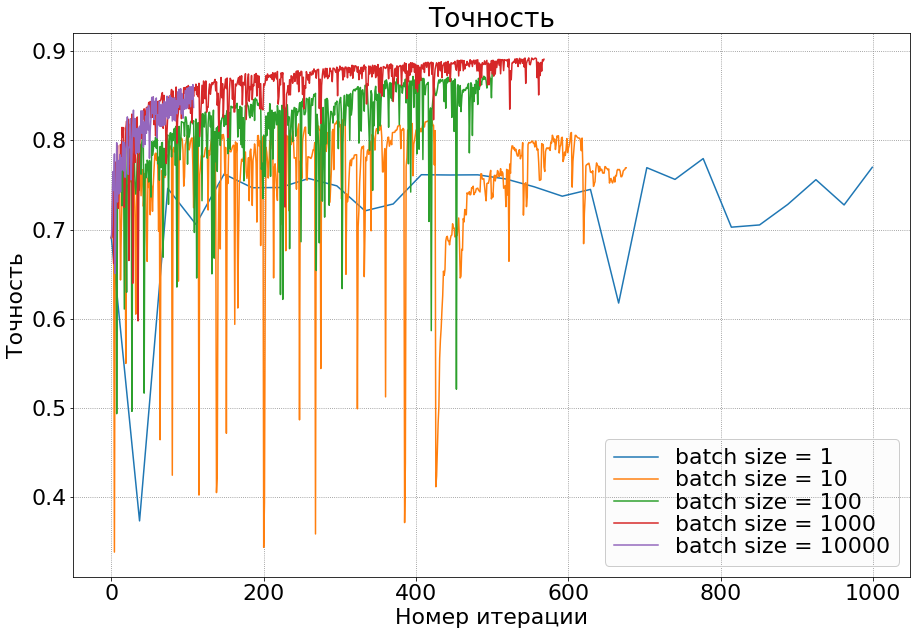

In [40]:
plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for batch_size in batch_sizes:
    x = results[batch_size]['iteration']
    y = results[batch_size]['func']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'b_sgd_func.pdf', format='pdf')
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for batch_size in batch_sizes:
    x = results[batch_size]['iteration']
    y = results[batch_size]['accuracy']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'b_sgd_acc.pdf', format='pdf')
plt.show()

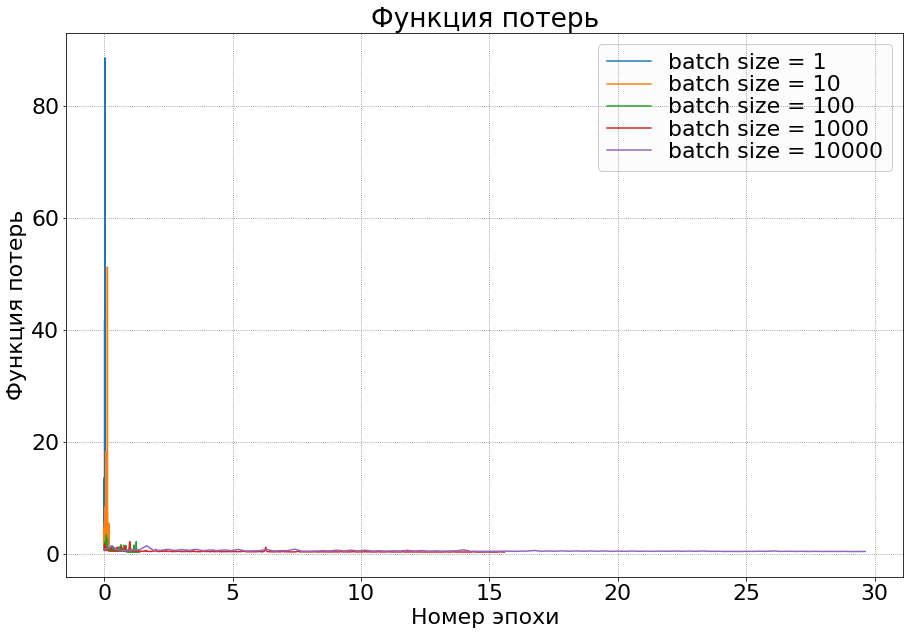

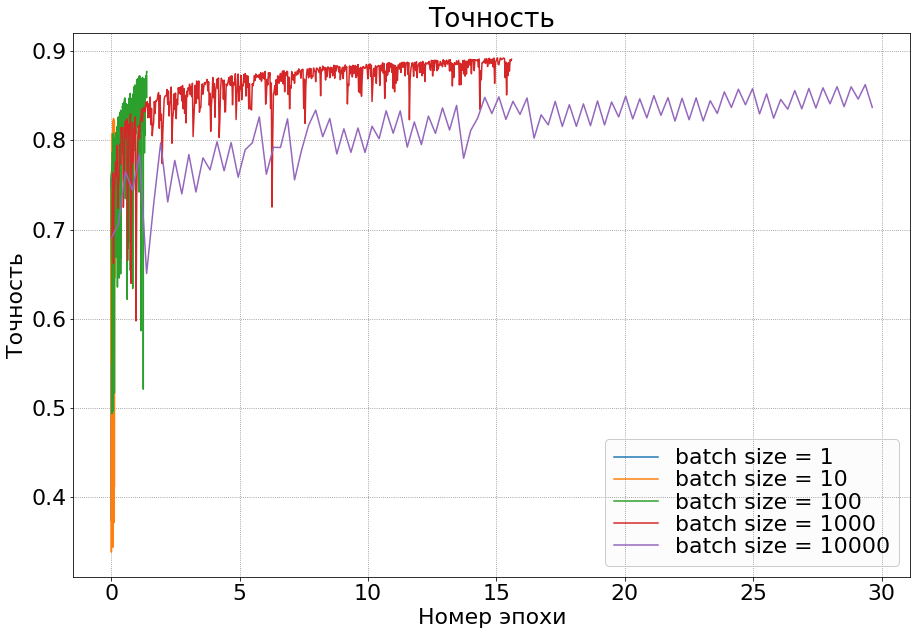

In [41]:
plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for batch_size in batch_sizes:
    x = results[batch_size]['epoch_num']
    y = results[batch_size]['func']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('Номер эпохи')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for batch_size in batch_sizes:
    x = results[batch_size]['epoch_num']
    y = results[batch_size]['accuracy']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('Номер эпохи')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.show()

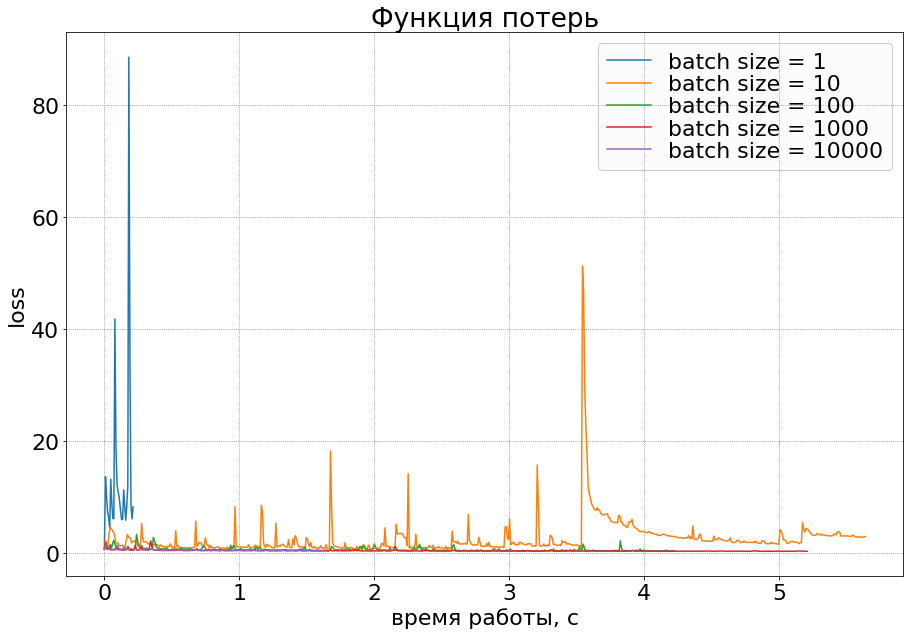

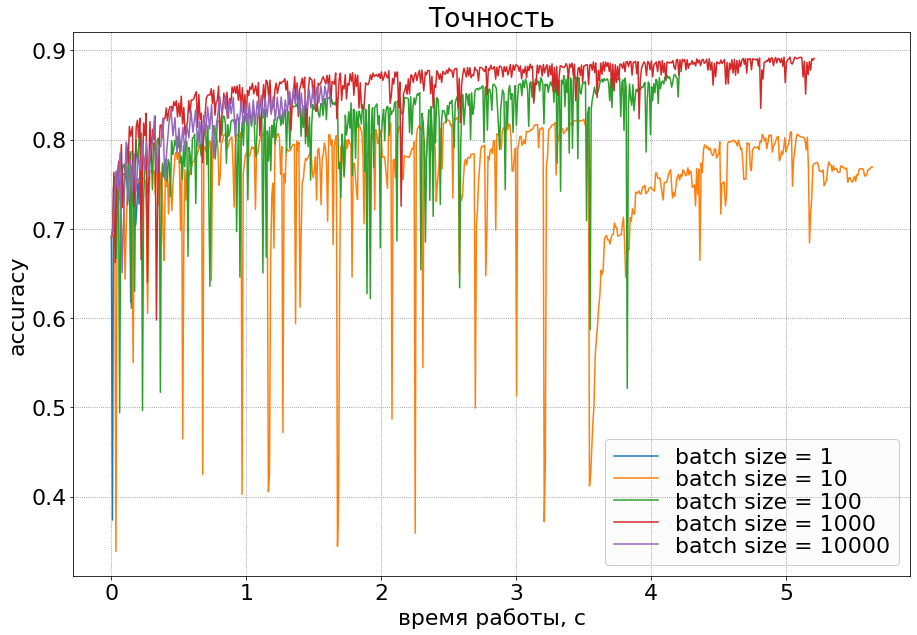

In [42]:
plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for batch_size in batch_sizes:
    x = np.cumsum(results[batch_size]['time'])
    y = results[batch_size]['func']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('время работы, с')
    plt.ylabel('loss')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)

plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for batch_size in batch_sizes:
    x = np.cumsum(results[batch_size]['time'])
    y = results[batch_size]['accuracy']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('время работы, с')
    plt.ylabel('accuracy')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.show()

In [83]:
### dynamic eta
batch_sizes = np.logspace(0, 4, 5).astype('int64')
results = {}
for batch_size in batch_sizes:
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=batch_size, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=1000, random_seed=153, **args)
    results[batch_size] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, log_freq=1e-4, X_val=X_val, y_val=y_val)

In [84]:
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1, step_alpha=1.75, step_beta=0.025, tolerance=1e-20, max_iter=1000, random_seed=153, **args)
results[1] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, log_freq=0.001, X_val=X_val, y_val=y_val)

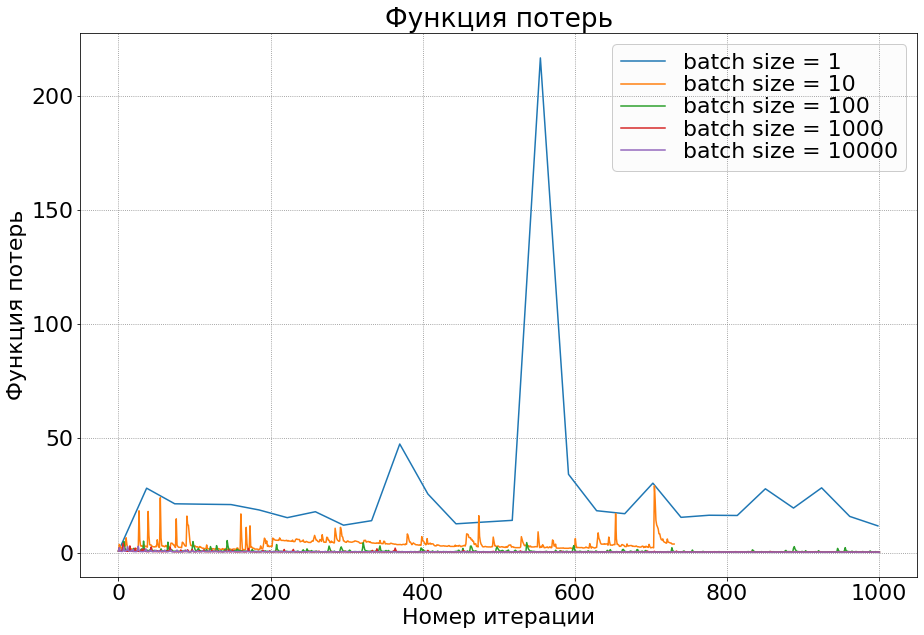

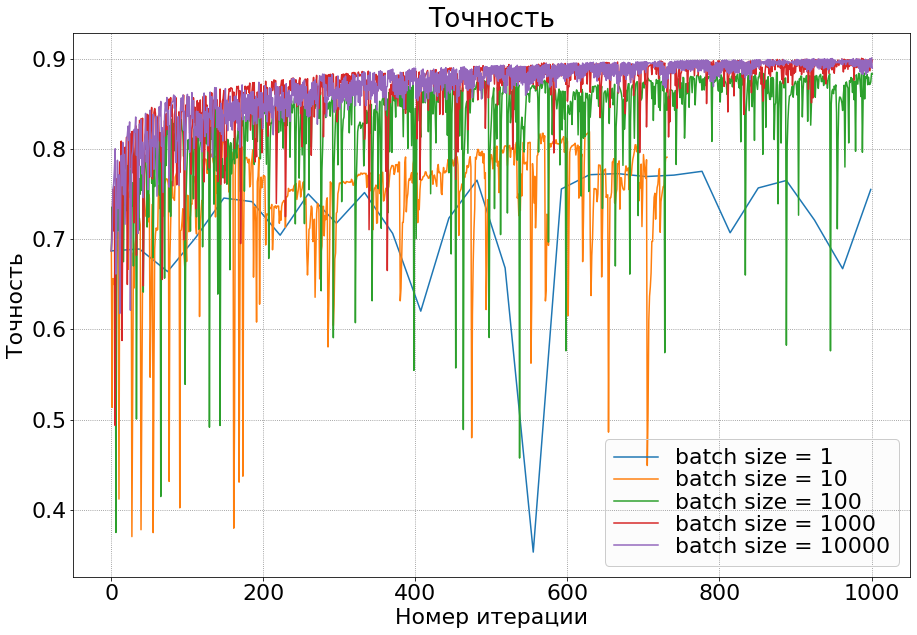

In [85]:
plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for batch_size in batch_sizes:
    x = results[batch_size]['iteration']
    y = results[batch_size]['func']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'bd_sgd_func.pdf', format='pdf')
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for batch_size in batch_sizes:
    x = results[batch_size]['iteration']
    y = results[batch_size]['accuracy']
    plt.plot(x, y, label=f'batch size = {batch_size:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'bd_sgd_acc.pdf', format='pdf')
plt.show()

# Исследование влияния регуляризации

In [43]:
l2_coefs = np.logspace(-1, -7, 7)
l2_coefs = np.append(l2_coefs, [0], axis = 0)
results = {}
for l2_coef in l2_coefs:
    l_args = {'l2_coef': l2_coef}
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **l_args)
    results[l2_coef] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, log_freq=1, X_val=X_val, y_val=y_val)

In [44]:
l2_coefs

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 0.e+00])

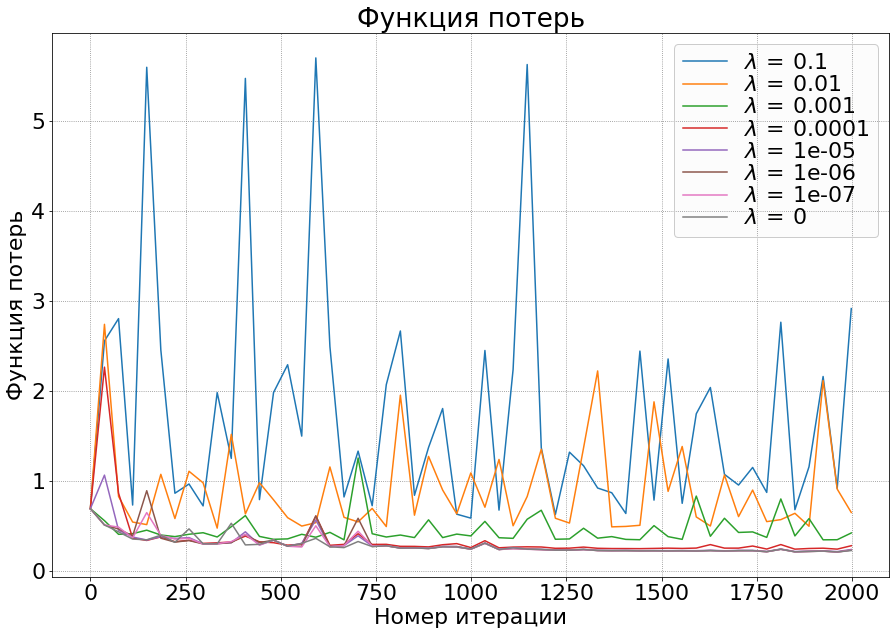

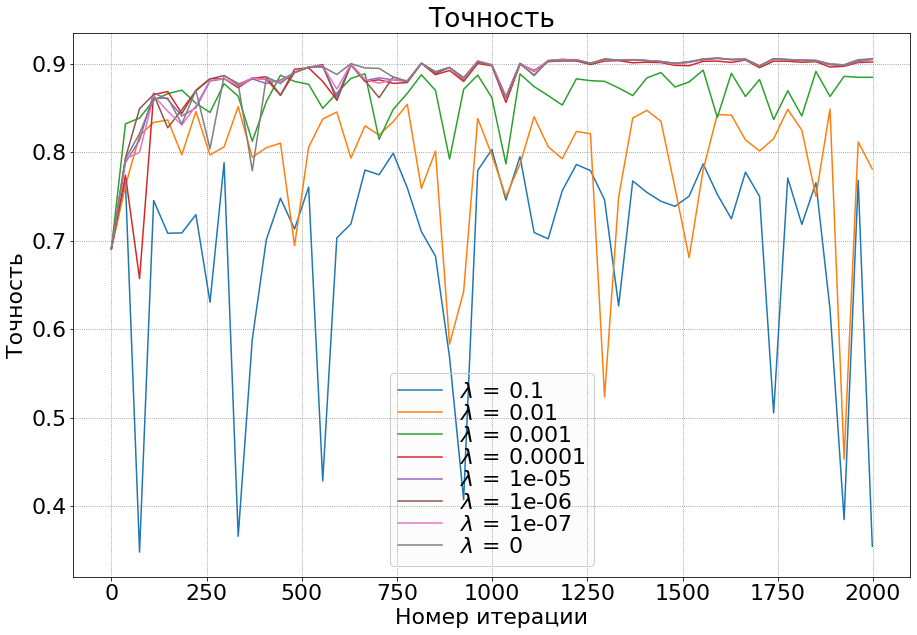

In [45]:
plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for l2_coef in l2_coefs:
    x = results[l2_coef]['iteration']
    y = results[l2_coef]['func']
    plt.plot(x, y, label=f'$\\lambda\,=\,${l2_coef:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'l_sgd_func.pdf', format='pdf')
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for l2_coef in l2_coefs:
    x = results[l2_coef]['iteration']
    y = results[l2_coef]['accuracy']
    plt.plot(x, y, label=f'$\\lambda\,=\,${l2_coef:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'l_sgd_acc.pdf', format='pdf')
plt.show()

In [46]:
results = {}
for l2_coef in l2_coefs:
    l_args = {'l2_coef': l2_coef}
    clf = GDClassifier(loss_function='binary_logistic', step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=1000, **l_args)
    results[l2_coef] = clf.fit(X_train_t, y_train_t.values, w_0=None, trace=True, X_val=X_val, y_val=y_val)

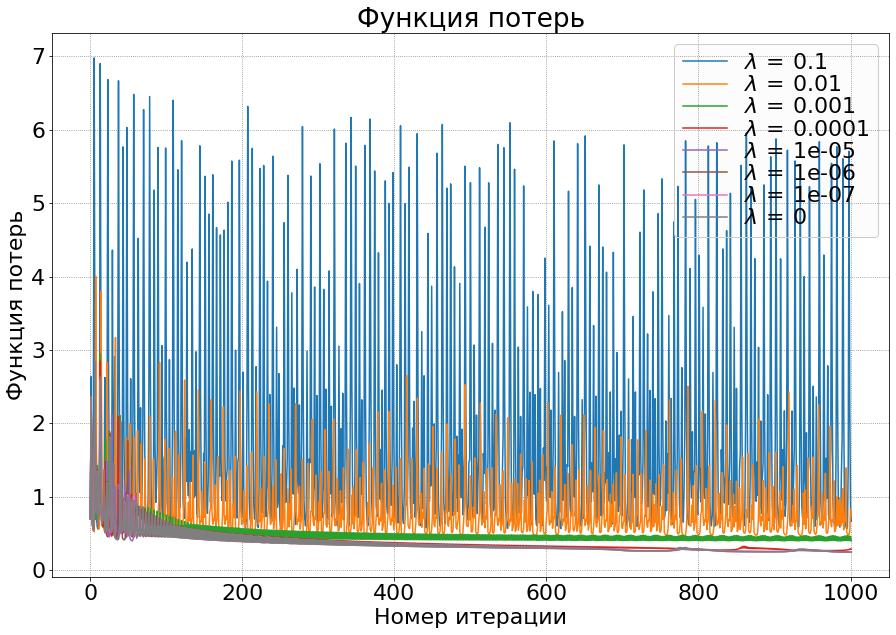

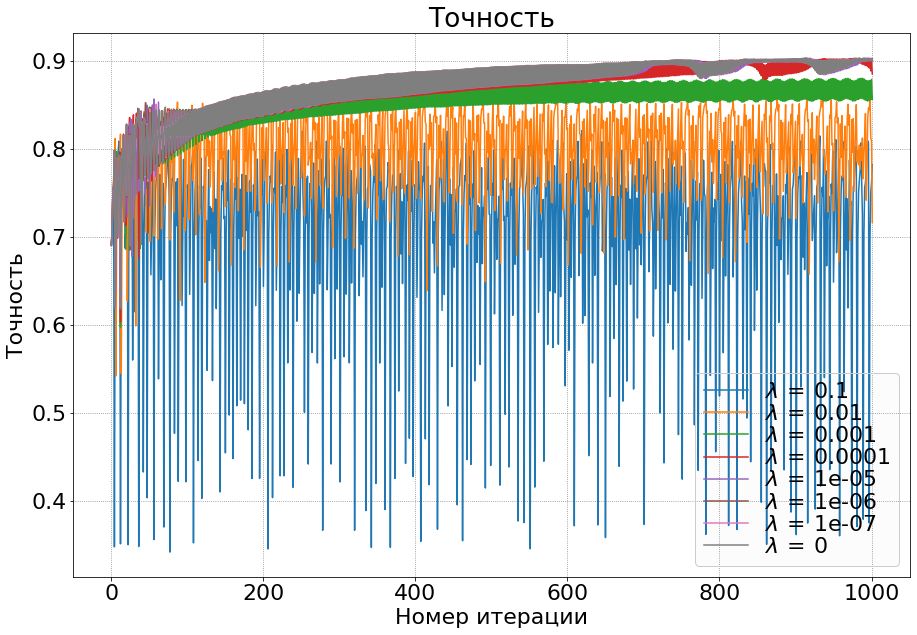

In [47]:
plt.figure(figsize=(15, 10))
plt.title(f'Функция потерь')
for l2_coef in l2_coefs:
    x = np.arange(len(results[l2_coef]['func']))
    y = results[l2_coef]['func']
    plt.plot(x, y, label=f'$\\lambda\,=\,${l2_coef:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Функция потерь')
legend = plt.legend(labelspacing=0.1)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'l_gd_func.pdf', format='pdf')
plt.figure(figsize=(15, 10))
plt.title(r'Точность')
for l2_coef in l2_coefs:
    x = np.arange(len(results[l2_coef]['accuracy']))
    y = results[l2_coef]['accuracy']
    plt.plot(x, y, label=f'$\\lambda\,=\,${l2_coef:g}')
    plt.xlabel('Номер итерации')
    plt.ylabel('Точность')
legend = plt.legend(labelspacing=0.1, loc='lower right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.savefig(fname=f'l_gd_acc.pdf', format='pdf')
plt.show()

# Исследование лемматизации и удаления стоп-слов

In [48]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
import nltk
nltk.download('stopwords')
def lemmatize(X):
    lemmatizer = WordNetLemmatizer()
    res = []
    for doc in X:
        res.append(' '.join(lemmatizer.lemmatize(word) for word in doc.split()))
    return res

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [51]:
args_list = [
    {'min_df': 0.0001,},
    {'min_df': 0.0001, 'stop_words': stopwords.words('english'),},
]
gdargs = {'l2_coef': 0}
X_train_l = pd.read_csv('toxic_train.csv')
X_test_l = pd.read_csv('toxic_test.csv')
y_train_l = X_train_l.pop('is_toxic')
y_test_l = X_test_l.pop('is_toxic')
X_train_l = preprocess(X_train_l)
X_test_l = preprocess(X_test_l)
y_train_l[y_train_l == True] = 1
y_train_l[y_train_l == False] = -1
y_train_l = y_train_l.astype('int64')
y_test_l[y_test_l == True] = 1
y_test_l[y_test_l == False] = -1
y_test_l = y_test_l.astype('int64')
for args in args_list:
    cv = CountVectorizer(**args)
    X_train_v = cv.fit_transform(X_train_l['comment_text'])
    X_test_v = cv.transform(X_test_l['comment_text'])
    print(X_train_v.shape[1])
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_v, y_train_l, trace=True)
    print((clf.predict(X_test_v) == y_test_l).mean(), np.sum(stat['time']) )
    
    cv = CountVectorizer(**args)
    X_train_v = cv.fit_transform(lemmatize(X_train_l['comment_text']))
    X_test_v = cv.transform(lemmatize(X_test_l['comment_text']))
    print(X_train_v.shape[1])
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_v, y_train_l, trace=True)
    print((clf.predict(X_test_v) == y_test_l).mean(), np.sum(stat['time']))

16050
0.8595473012188044 0.603412389755249
14433
0.8618204681756626 0.5749623775482178
15907
0.8668020893789902 0.4789879322052002
14294
0.8679628554846198 0.4769933223724365


# BagOfWords / TFIDF

In [54]:
X_train_l = pd.read_csv('toxic_train.csv')
X_test_l = pd.read_csv('toxic_test.csv')
y_train_l = X_train_l.pop('is_toxic')
y_test_l = X_test_l.pop('is_toxic')
X_train_l = preprocess(X_train_l)
X_test_l = preprocess(X_test_l)
y_train_l[y_train_l == True] = 1
y_train_l[y_train_l == False] = -1
y_train_l = y_train_l.astype('int64')
y_test_l[y_test_l == True] = 1
y_test_l[y_test_l == False] = -1
y_test_l = y_test_l.astype('int64')

In [53]:
cv = CountVectorizer(min_df=0.0001)
X_train_l = cv.fit_transform(X_train_l['comment_text'])
X_test_l = cv.transform(X_test_l['comment_text'])
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
stat = clf.fit(X_train_l, y_train_l, trace=True)
print(X_train_l.shape[1], (clf.predict(X_test_l) == y_test_l).mean(), np.sum(stat['time']))    
tf = TfidfTransformer()
tf.fit(X_train_l)
X_train_l = tf.transform(X_train_l)
X_test_l = tf.transform(X_test_l)
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
stat = clf.fit(X_train_l, y_train_l, trace=True)
print(X_train_l.shape[1], (clf.predict(X_test_l) == y_test_l).mean(), np.sum(stat['time']))


16050 0.8595473012188044 0.6004605293273926
16050 0.8490520410137358 0.4311532974243164


In [55]:
X_train_l = pd.read_csv('toxic_train.csv')
X_test_l = pd.read_csv('toxic_test.csv')
y_train_l = X_train_l.pop('is_toxic')
y_test_l = X_test_l.pop('is_toxic')
X_train_l = preprocess(X_train_l)
X_test_l = preprocess(X_test_l)
y_train_l[y_train_l == True] = 1
y_train_l[y_train_l == False] = -1
y_train_l = y_train_l.astype('int64')
y_test_l[y_test_l == True] = 1
y_test_l[y_test_l == False] = -1
y_test_l = y_test_l.astype('int64')

cv = CountVectorizer(min_df=0.0001)
X_train_v = cv.fit_transform(lemmatize(X_train_l['comment_text']))
X_test_v = cv.transform(lemmatize(X_test_l['comment_text']))
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
stat = clf.fit(X_train_v, y_train_l, trace=True)
print(X_train_v.shape[1], (clf.predict(X_test_v) == y_test_l).mean(), np.sum(stat['time']))
tf = TfidfTransformer()
tf.fit(X_train_v)
X_train_v = tf.transform(X_train_v)
X_test_v = tf.transform(X_test_v)
clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
stat = clf.fit(X_train_v, y_train_l, trace=True)
print(X_train_v.shape[1], (clf.predict(X_test_v) == y_test_l).mean(), np.sum(stat['time']))

14433 0.8618204681756626 0.5467367172241211
14433 0.8536951054362546 0.4264059066772461


# min_df / max_df

In [56]:
for min_df in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]:
    cv = CountVectorizer(min_df=min_df)
    X_train_ll = cv.fit_transform(X_train_l['comment_text'])
    X_test_ll = cv.transform(X_test_l['comment_text'])
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_ll, y_train_l, trace=True)
    print('BoW', min_df, X_train_ll.shape[1], (clf.predict(X_test_ll) == y_test_l).mean(), np.sum(stat['time']))
    
    tf = TfidfTransformer()
    tf.fit(X_train_ll)
    X_train_ll = tf.transform(X_train_ll)
    X_test_ll = tf.transform(X_test_ll)
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_ll, y_train_l, trace=True)
    print('TFIDF', min_df, X_train_ll.shape[1], (clf.predict(X_test_ll) == y_test_l).mean(), np.sum(stat['time']))

BoW 1e-06 89368 0.861917198684465 0.6761009693145752
TFIDF 1e-06 89368 0.8454730121880442 0.5452916622161865
BoW 1e-05 89368 0.861917198684465 0.6459779739379883
TFIDF 1e-05 89368 0.8454730121880442 0.5344264507293701
BoW 0.0001 16050 0.8595473012188044 0.5547709465026855
TFIDF 0.0001 16050 0.8490520410137358 0.44444799423217773
BoW 0.001 3736 0.858434900367576 0.39333081245422363
TFIDF 0.001 3736 0.8538885664538596 0.3002018928527832
BoW 0.01 568 0.7541110466241052 0.3484230041503906
TFIDF 0.01 568 0.83671890114142 0.26625657081604004


In [57]:
for max_df in [1.0, 0.75, 0.6, 0.5, 0.3, 0.1, 0.05]:
    cv = CountVectorizer(max_df=max_df)
    X_train_ll = cv.fit_transform(X_train_l['comment_text'])
    X_test_ll = cv.transform(X_test_l['comment_text'])
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_ll, y_train_l, trace=True)
    print('BoW', max_df, X_train_ll.shape[1], (clf.predict(X_test_ll) == y_test_l).mean(), np.sum(stat['time']))
    
    tf = TfidfTransformer()
    tf.fit(X_train_ll)
    X_train_ll = tf.transform(X_train_ll)
    X_test_ll = tf.transform(X_test_ll)
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_ll, y_train_l, trace=True)
    print('TFIDF', max_df, X_train_ll.shape[1], (clf.predict(X_test_ll) == y_test_l).mean(), np.sum(stat['time']))

BoW 1.0 89368 0.861917198684465 0.6711759567260742
TFIDF 1.0 89368 0.8454730121880442 0.5376706123352051
BoW 0.75 89368 0.861917198684465 0.6902673244476318
TFIDF 0.75 89368 0.8454730121880442 0.5324461460113525
BoW 0.6 89367 0.863948539369317 0.6825528144836426
TFIDF 0.6 89367 0.848278196943316 0.5409305095672607
BoW 0.5 89365 0.866995550396595 0.7002911567687988
TFIDF 0.5 89365 0.8512768427161926 0.5388836860656738
BoW 0.3 89357 0.8670439156509964 0.6411259174346924
TFIDF 0.3 89357 0.8555813503579028 0.5139684677124023
BoW 0.1 89313 0.8659315147997678 0.5789053440093994
TFIDF 0.1 89313 0.8651093054749468 0.4633972644805908
BoW 0.05 89260 0.8668988198877926 0.534663200378418
TFIDF 0.05 89260 0.8704778487134842 0.44446539878845215


# Применение к тестовой выборке

In [58]:
X_train_l = pd.read_csv('toxic_train.csv')
X_test_l = pd.read_csv('toxic_test.csv')
y_train_l = X_train_l.pop('is_toxic')
y_test_l = X_test_l.pop('is_toxic')
X_train_l = preprocess(X_train_l)
X_test_l = preprocess(X_test_l)
y_train_l[y_train_l == True] = 1
y_train_l[y_train_l == False] = -1
y_train_l = y_train_l.astype('int64')
y_test_l[y_test_l == True] = 1
y_test_l[y_test_l == False] = -1
y_test_l = y_test_l.astype('int64')
cv = CountVectorizer(min_df=1e-5, max_df=0.3)
X_train_ll = cv.fit_transform(lemmatize(X_train_l['comment_text']))
X_test_ll = cv.transform(lemmatize(X_test_l['comment_text']))

clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
stat = clf.fit(X_train_ll, y_train_l, trace=True)
print((clf.predict(X_test_ll) == y_test_l).mean())

0.8685432385374348


# Анализ ошибок

In [59]:
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    labels = np.unique(np.concatenate((y_true, y_pred), axis=0))
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(conf_matrix, cmap=plt.cm.Oranges)
    ax.set_xticks(np.arange(conf_matrix.shape[1]))
    ax.set_yticks(np.arange(conf_matrix.shape[0]))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Истинный класс')
    ax.set_xlabel('Предсказанный класс')
    ax.set_label('Матрица ошибок')
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j])

    plt.savefig(fname='fig.pdf', format='pdf')


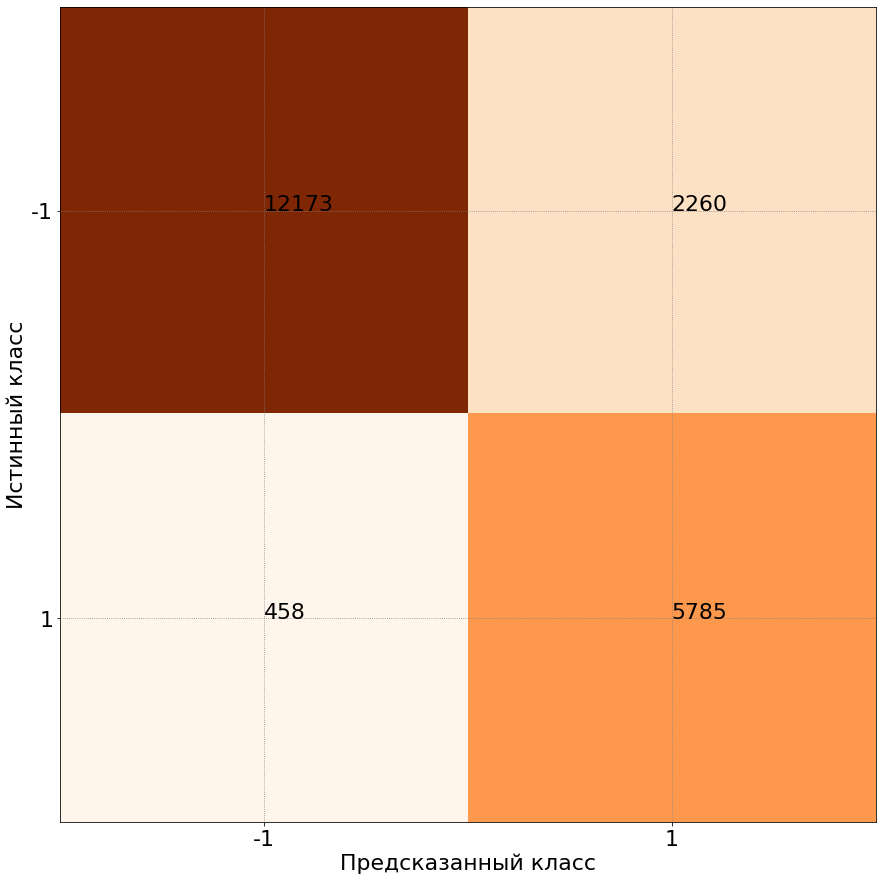

In [60]:
show_confusion_matrix(y_test_l, clf.predict(X_test_ll))

In [61]:
ans = (clf.predict(X_test_ll))
errors = (ans != y_test_l.values)
idx = np.argwhere(errors)
idx

array([[    1],
       [   12],
       [   17],
       ...,
       [20630],
       [20652],
       [20674]])

In [62]:
errors.mean()

0.1314567614625653

In [63]:
X_test_f = pd.read_csv('toxic_test.csv')
y_test_f = X_test_f.pop('is_toxic')

In [64]:
X_test_f.iloc[1]['comment_text']

':Dear god this site is horrible.'

In [65]:
X_test_f.iloc[20630]['comment_text']

'Please, someone fix this godawful article.'

In [66]:
X_test_f.iloc[17]['comment_text']

'" \n\n ==balance== \n This page has one sentence about the basic definition of the word, and a huge amount about the slang/profane uses. Perhaps the former should be extended; is there no information about female dogs available beyond their name? This is an encyclopaedia, not a dictionary.  \n\n  \n i feel that whoever is looking this definition up is very appropiate and should be deleted from wikipedia...IMMEDIATLY. this word is used very often and is also a very ""mean"" word. i belive that is majorly true. very much so. okay so, the good meaning is a female dog.  BITCH !!!!!!!!!It also stands for the name Brittany Fellows—Preceding unsigned comment added by   •    \n\n ==etymology== \n The word bitch is from the Old Norse Bikkjuna meaning ""female of the dog"" of unknown origin, Grimm derives the Old Norse words from Lapp Pittja, But OED notes that ""the converse is equally possible."" \n The adj. Bitchy was first seen in 1925.  \n The verb meaning to complain in 1930. \n Slang Bit

In [67]:
idx[:20]

array([[  1],
       [ 12],
       [ 17],
       [ 27],
       [ 30],
       [ 38],
       [ 50],
       [ 56],
       [ 61],
       [ 66],
       [ 78],
       [ 79],
       [ 87],
       [ 99],
       [100],
       [102],
       [108],
       [110],
       [148],
       [150]])

In [68]:
X_test_f.iloc[99]['comment_text']

'and lewd sex in China'

In [69]:
X_test_f.iloc[61]['comment_text']

'== black mamba == \n\n It.is ponious snake of the word and but it not kills many people but king cobra kills many people in India'

# n-граммы

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer


for i in range(1, 10):
    tfidfer = TfidfVectorizer(min_df=1e-5, max_df=0.3, ngram_range=(1, i))
    X_train_l = pd.read_csv('toxic_train.csv')
    X_test_l = pd.read_csv('toxic_test.csv')
    y_train_l = X_train_l.pop('is_toxic')
    y_test_l = X_test_l.pop('is_toxic')
    X_train_l = preprocess(X_train_l)
    X_test_l = preprocess(X_test_l)
    y_train_l[y_train_l == True] = 1
    y_train_l[y_train_l == False] = -1
    y_train_l = y_train_l.astype('int64')
    y_test_l[y_test_l == True] = 1
    y_test_l[y_test_l == False] = -1
    y_test_l = y_test_l.astype('int64')
    tf = TfidfVectorizer(min_df=1e-5, max_df=0.3, ngram_range=(1, i))
    X_train_ll = tf.fit_transform(X_train_l['comment_text'])
    X_test_ll = tf.transform(X_test_l['comment_text'])
    clf = SGDClassifier(loss_function='binary_logistic', batch_size=1000, step_alpha=1.75, step_beta=0.025, tolerance=1e-7, max_iter=2000, random_seed=153, **gdargs)
    stat = clf.fit(X_train_ll, y_train_l, trace=True)
    print(X_train_ll.shape[1], (clf.predict(X_test_ll) == y_test_l).mean(), np.sum(stat['time']))


89357 0.8555813503579028 0.5121164321899414
1012240 0.835703230798994 1.5716300010681152
2996706 0.8161153027664926 3.354013681411743
5461337 0.8055716773070226 5.374568462371826
8026525 0.799332559489263 6.846829175949097
10581455 0.79609208744438 8.26328992843628
13102075 0.7929483459082994 10.42232060432434
15583598 0.7919810408202748 11.321841716766357
18025483 0.791207196749855 12.859038829803467
